# <font color = 'orange'> **Lending club case study**

## PROBLEM STATEMENT:
To work on the data of the loan applications to find out the strong indicators of default,
so as to minimize the credit loss to the banking and financial sector companies.

Perform analysis using EDA techniques to understand and pick the driving factors behind loan defaults.
The analysis can be utilised by the banks for risk assessment during provision of loans.

# <font color = 'red'> **Import dependencies**

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

# <font color = 'red'> **Set display options**

In [2]:
# Setting pandas display option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 112)
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings('ignore')


In [3]:
pd.reset_option('display.max_colwidth')

# <font color = 'red'> **Load dataset**

In [4]:
# Importing dataset
loan_df = pd.read_csv('loan.csv')

# <font color = 'red'> **View dataset**

In [5]:
# Checking shape of dataset
loan_df.shape

(39717, 111)

In [6]:
loan_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## <font color = 'blue'> *check the data information*

In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
loan_df.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717,39717,39717.000000,39717,39717,37258,38642,39717,3.971700e+04,39717,39717,39717,39717,39717,26775,39717,39706,39717,39717,39717.000000,39717.000000,39717,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39667,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,1140,39715,39661.0,0.0,39717.0,39717,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,2,371,NaN,7,35,28820,11,5,NaN,3,55,3,1,39717,26526,14,19615,823,50,NaN,NaN,526,NaN,NaN,NaN,NaN,NaN,NaN,1089,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,NaN,2,106,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Nov-98,NaN,NaN,NaN,NaN,NaN,NaN,0%,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-16,NaN,Jun-16,May-16,NaN,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,29096,956,NaN,12020,2917,134,8879,18899,NaN,16921,2260,32950,39717,1,210,18641,2184,597,7099,NaN,NaN,370,NaN,NaN,NaN,NaN,NaN,NaN,977,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1256,NaN,1125,10308,NaN,NaN,NaN,39717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,NaN,NaN,324.561922,NaN,NaN,NaN,NaN,NaN,6.896893e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.315130,0.14

In [9]:
loan_df.isnull().sum().head(112)

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### <font color = 'orange'> **observations**
* <font color = 'blue'> There are 57 columns which have more than 50% null values
* <font color = 'blue'> these columns will not be considered for analysis

In [10]:
final_columns = loan_df.isnull().sum() < 20000

In [11]:
loan_df_1 = loan_df[final_columns[final_columns == True].index]

In [12]:
loan_df_1.shape

(39717, 54)

# <font color = 'red'> **Data cleaning and manipulation**
    

In [13]:
loan_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [14]:
# checking the null values count of each column
loan_df_1.isnull().sum().head(100)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [15]:
loan_df_1.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


* <font color = 'blue'> features are categorised into 3 types: `'consumer attributes'`, `'loan attributes'` and `'consumer behavior attributes'`
* <font color = 'blue'> only 'consumer attributes' and 'loan attributes' are considered for analysis
* <font color = 'blue'> 'consumer behavior attrubutes' are not considered, as they come to play only after loan is sanctioned
* <font color = 'blue'> Columns which are not useful for analysis are also not considered. Eg: id, member_id etc.

In [16]:
cons_attr = ['emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'addr_state',
             'zip_code',  'application_type', 'pub_rec_bankruptcies']
loan_attr = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'issue_d', 'loan_status', 'dti', 'policy_code']


In [17]:
# Selecting required columns
loan_df_1 = loan_df_1[cons_attr + loan_attr]

In [18]:
loan_df_1.shape

(39717, 20)

In [19]:
# checking the null values
loan_df_1.isnull().sum()/ loan_df_1.shape[0]*100

emp_title               6.191303
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
purpose                 0.000000
addr_state              0.000000
zip_code                0.000000
application_type        0.000000
pub_rec_bankruptcies    1.754916
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
issue_d                 0.000000
loan_status             0.000000
dti                     0.000000
policy_code             0.000000
dtype: float64

## <font color = 'red'> *column wise data cleaning*
* <font color = 'blue'> filling null values and changing datatype as required
* <font color = 'blue'> cleaning data values which are beyond the logic range of their column
* <font color = 'blue'> removing unwanted text from the values of some columns
* <font color = 'blue'> creating new columns from the existing columns after some changes

In [20]:
# Dropping duplicates
loan_df_1.drop_duplicates(keep='first', inplace=True)

### <font color = 'blue'> column 'term'
    - The number of payments on the loan. Values are in months and can be either 36 or 60.

In [21]:
loan_df_1['term'].value_counts()

term
 36 months    29096
 60 months    10621
Name: count, dtype: int64

* <font color  = 'blue'> column 'term' is clean

### <font color = 'blue'> column 'loan_amnt'
    - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [22]:
# understanding if values are within expected range
loan_df_1['loan_amnt'].min(), loan_df_1['loan_amnt'].max()

(500, 35000)

In [23]:
# understanding if values are within expected range
loan_df_1['loan_amnt'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97,0.98,0.99, 1])

0.10     3200.0
0.20     5000.0
0.30     6000.0
0.40     8000.0
0.50    10000.0
0.60    12000.0
0.70    14000.0
0.80    16750.0
0.90    22000.0
0.95    25000.0
0.96    25484.0
0.97    30000.0
0.98    31468.0
0.99    35000.0
1.00    35000.0
Name: loan_amnt, dtype: float64

<AxesSubplot: >

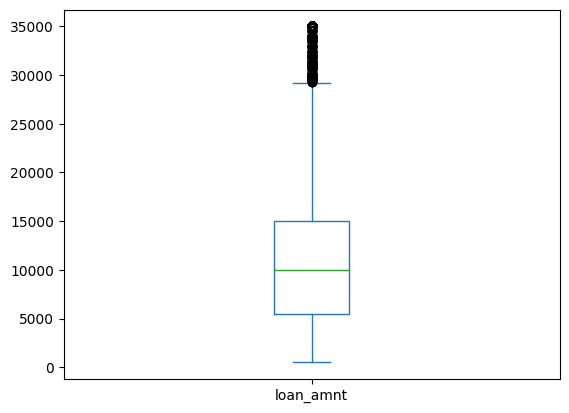

In [24]:
# understanding if values are within expected range through box plot
loan_df_1['loan_amnt'].plot.box()

In [25]:
loan_df_1[loan_df_1['loan_amnt'] > 30000].shape

(828, 20)

* <font color = 'blue'> column 'loan_amnt' has outlier. Values beyond 30000 are outliers
* <font color = 'blue'> consider data without outliers, as the overall records of outliers are much lesser than total records


In [26]:
loan_df_1 = loan_df_1[loan_df_1['loan_amnt'] < 30000]

In [27]:
loan_df_1.shape

(38512, 20)

### <font color = 'blue'> column 'int_rate'
    - Interest Rate on the loan

In [28]:
# Extracting interest value from int_rate
loan_df_1['int_rate(%)'] = loan_df_1['int_rate'].str.replace('%', '').astype(float)

In [29]:
# checking if the values within expected range
loan_df_1['int_rate(%)'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.96, 0.97,0.98,0.99, 1])

0.10     7.140
0.20     7.900
0.30     9.990
0.40    10.990
0.50    11.710
0.60    12.730
0.70    13.778
0.80    15.208
0.90    16.770
0.95    18.250
0.96    18.640
0.97    19.040
0.98    19.740
0.99    20.890
1.00    24.590
Name: int_rate(%), dtype: float64

<AxesSubplot: >

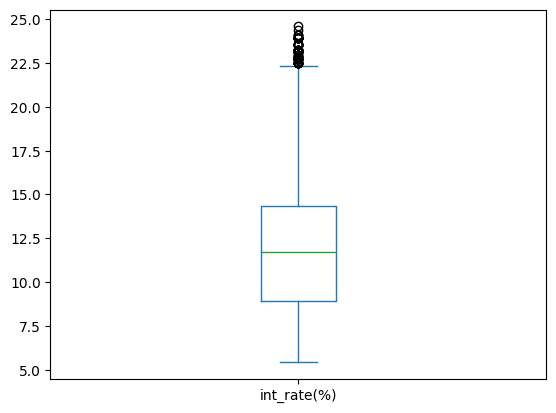

In [30]:
# finding the outliers through boxplot
loan_df_1['int_rate(%)'].plot.box()

In [31]:
loan_df_1[loan_df_1['int_rate(%)'] > 22.5].shape

(53, 21)

In [32]:
loan_df_1 = loan_df_1[loan_df_1['int_rate(%)'] < 22.5]

In [33]:
loan_df_1.shape

(38459, 21)

* <font color = 'blue'> column 'int_rate' -> '%' is removed to have only float values
* <font color = 'blue'> column 'int_rate' has outliers. Values beyond 22.5 are outliers and removed for further analysis

### <font color = 'blue'> column 'installment'
    - The monthly payment owed by the borrower if the loan originates.

In [34]:
# understanding if values are within expected range
loan_df_1['installment'].min(), loan_df_1['installment'].max()

(15.69, 1082.9)

<AxesSubplot: >

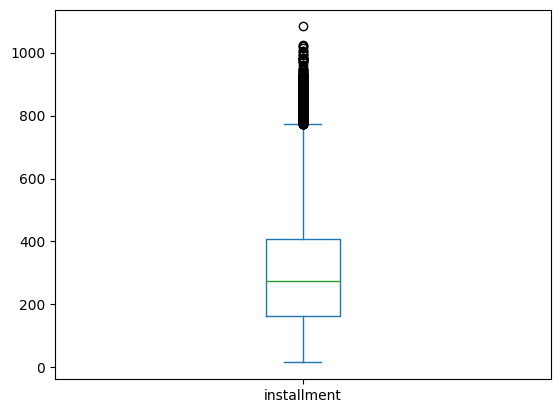

In [35]:
# understanding if values are within expected range using box plot
loan_df_1['installment'].plot.box()

In [36]:
loan_df_1[loan_df_1['installment'] > 800].shape

(926, 21)

In [37]:
loan_df_1 = loan_df_1[loan_df_1['installment'] < 800]

In [38]:
loan_df_1.shape

(37533, 21)

* <font color = 'blue'> column 'installment' has outliers. Values beyond 800 are outliers and are removed for further analysis

### <font color = 'blue'> column 'emp_title'
    - The job title supplied by the Borrower when applying for the loan.*

In [39]:
loan_df_1['emp_title'].value_counts()

emp_title
US Army                                     120
Bank of America                             106
IBM                                          56
AT&T                                         54
Wells Fargo                                  52
                                           ... 
USDA/FMMA                                     1
DEVNET INC                                    1
Kforce Professional / Kaiser Permanente       1
Salem Communications                          1
Evergreen Center                              1
Name: count, Length: 27478, dtype: int64

In [40]:
loan_df_1['emp_title'].isnull().sum()

2297

* <font color = 'blue'> There are 2297 null values, but `mode` frequency is 120 which is quite lesser than count of null values
* <font color = 'blue'> filling the null values in emp_title with 'Unknown'
* <font color = 'blue'> filling null values in emp_title with `mode` of the column is meaningless and inaccurate

In [42]:
loan_df_1['emp_title'].fillna('Unknown', inplace=True)

### <font color = 'blue'> column 'emp_length'
    - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [43]:
loan_df_1['emp_length'].value_counts()

emp_length
10+ years    8128
< 1 year     4414
2 years      4197
3 years      3918
4 years      3266
5 years      3109
1 year       3103
6 years      2113
7 years      1674
8 years      1376
9 years      1187
Name: count, dtype: int64

In [44]:
# filling null values with `mode`
loan_df_1['emp_length'].fillna('10', inplace = True)

* <font color = 'blue'> Now replacing text with numbers

In [45]:

loan_df_1['emp_length'] = loan_df_1['emp_length'].str.replace(' years', '')
loan_df_1['emp_length'] = loan_df_1['emp_length'].str.replace(' year', '')
loan_df_1['emp_length'] = loan_df_1['emp_length'].str.replace('< 1', '0')
loan_df_1['emp_length'] = loan_df_1['emp_length'].str.replace('10+', '10')

loan_df_1['emp_length'] = loan_df_1['emp_length'].astype(int)

In [46]:
loan_df_1['emp_length'].value_counts()

emp_length
10    9176
0     4414
2     4197
3     3918
4     3266
5     3109
1     3103
6     2113
7     1674
8     1376
9     1187
Name: count, dtype: int64

### <font color = 'blue'> column 'grade'
    - LC assigned loan grade

In [48]:
# finding the unique values of grade
loan_df_1['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

* <font color = 'blue'> column 'grade' is clean

### <font color = 'blue'> column 'sub_grade'
    - LC assigned loan subgrade

In [49]:
# finding the unique values of sub_grade
loan_df_1['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'E2', 'F5', 'G1', 'G2', 'G5',
       'G3', 'G4'], dtype=object)

* <font color = 'blue'> column 'sub_grade' is clean

### <font color = 'blue'> column 'home_ownership'
    - The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [50]:
# finding the values in the column and their frequency
loan_df_1['home_ownership'].value_counts()

home_ownership
RENT        18222
MORTGAGE    16284
OWN          2930
OTHER          94
NONE            3
Name: count, dtype: int64

* <font color = 'blue'> 'NONE' and 'OTHER' are merged as 'OTHER'

In [51]:
loan_df_1['home_ownership'] = loan_df_1['home_ownership'].str.replace('NONE', 'OTHER')

In [52]:
loan_df_1['home_ownership'].value_counts()

home_ownership
RENT        18222
MORTGAGE    16284
OWN          2930
OTHER          97
Name: count, dtype: int64

### <font color = 'blue'> column 'annual_inc'
    - The self-reported annual income provided by the borrower during registration.

In [53]:
# understanding if values are within expected range
loan_df_1['annual_inc'].min(), loan_df_1['annual_inc'].max()

(4000.0, 6000000.0)

In [55]:
# finding out the outliers
loan_df_1['annual_inc'].quantile([0.1, 0.25, 0.5, 0.7, 0.9, 0.95, 0.96, 0.97, 0.98,0.99, 1])

0.10      29442.40
0.25      40000.00
0.50      56000.00
0.70      73566.80
0.90     110000.00
0.95     132000.00
0.96     140004.00
0.97     152000.16
0.98     175000.00
0.99     203032.80
1.00    6000000.00
Name: annual_inc, dtype: float64

<AxesSubplot: >

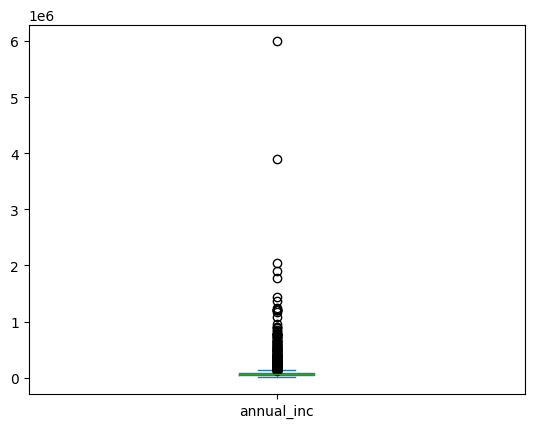

In [56]:
loan_df_1['annual_inc'].plot.box()

* <font color = 'blue'> annual_inc has too many outliers
* <font color = 'blue'> taking the values only till 99th percentile

In [57]:
upper_range = loan_df_1['annual_inc'].quantile(0.99)

In [58]:
# dropping outliers
loan_df_1 = loan_df_1[loan_df_1['annual_inc'] <= upper_range]

<AxesSubplot: >

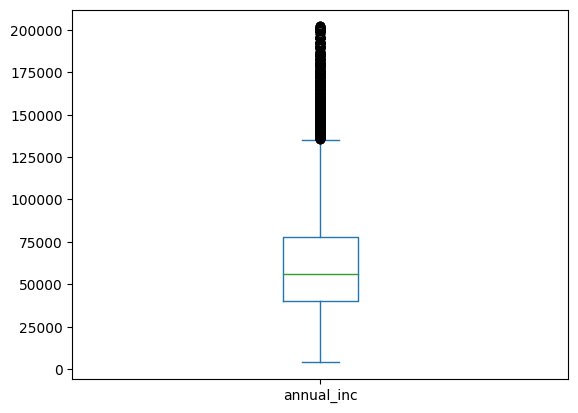

In [59]:
loan_df_1['annual_inc'].plot.box()

In [60]:
loan_df_1[loan_df_1['annual_inc'] > 130000].shape

(1543, 21)

* <font color = 'blue'> there are still outliers in the `annual_inc` column, hence dropping them
* <font color = 'blue'> the number of rows that will be dropped is less than 5% of whole data, so dropping them will not impact analysis

In [61]:
loan_df_1 = loan_df_1[loan_df_1['annual_inc'] < 130000]

In [62]:
loan_df_1.shape

(35442, 21)

### <font color = 'blue'> column 'verification_status'
    - Indicates if income was verified by LC, not verified, or if the income source was verified

In [63]:
# finding unique values and their frequency
loan_df_1['verification_status'].value_counts()

verification_status
Not Verified       16139
Verified           10216
Source Verified     9087
Name: count, dtype: int64

* <font color = 'blue'> column 'verification_status' is clean

### <font color = 'blue'> column 'issue_d'
    - The month and year which the loan was funded

In [64]:
# finding unique values and their frequency
loan_df_1['issue_d'].value_counts()[:5]

issue_d
Dec-11    1991
Nov-11    1928
Oct-11    1771
Sep-11    1754
Aug-11    1673
Name: count, dtype: int64

* <font color = 'blue'> Extracting monrth and year from issue_d

In [65]:
loan_df_1[['issue_d_month', 'issue_d_year']] = loan_df_1['issue_d'].str.extract(r'([A-Za-z]+)-(\d+)')

In [66]:
loan_df_1['issue_d_month'].unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

In [67]:
loan_df_1['issue_d_year'].unique()

array(['11', '10', '09', '08', '07'], dtype=object)

In [68]:
# Converting the year to 20xx format
loan_df_1['issue_d_year'] = '20' + loan_df_1['issue_d_year']

In [69]:
loan_df_1['issue_d_year'].unique()

array(['2011', '2010', '2009', '2008', '2007'], dtype=object)

* <font color = 'blue'> extracted month and year from the 'issue_d' column
* <font color = 'blue'> converted the year to 20xx format


### <font color = 'blue'> column 'loan_status'
    - Current status of the loan

In [70]:
# finding unique values and their frequency
loan_df_1['loan_status'].value_counts()

loan_status
Fully Paid     29488
Charged Off     5026
Current          928
Name: count, dtype: int64

* <font color = 'blue'> column 'loan_status' is clean

### <font color = 'blue'> column 'purpose'
    - A category provided by the borrower for the loan request. 

In [71]:
# finding unique values
loan_df_1['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

* <font color = 'blue'> column 'purpose' is clean

### <font color = 'blue'> column 'zip_code'
    - The first 3 numbers of the zip code provided by the borrower in the loan application.

In [72]:
# finding unique values
loan_df_1['zip_code'].unique()[:20]

array(['860xx', '309xx', '606xx', '917xx', '972xx', '852xx', '280xx',
       '900xx', '958xx', '774xx', '853xx', '913xx', '245xx', '951xx',
       '641xx', '921xx', '067xx', '890xx', '770xx', '335xx'], dtype=object)

In [73]:
loan_df_1['zip_code'].nunique()

816

* <font color = 'blue'> column 'zip_code' is not useful as complete data is not provided, and there is no way we can get complete data of zip codes

### <font color = 'blue'> column 'addr_state'
    - The state provided by the borrower in the loan application

In [74]:
# finding unique values count
loan_df_1['addr_state'].nunique()

50

In [75]:
# finding unique values
loan_df_1['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'KY', 'OH', 'SC', 'NJ', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'IA', 'TN', 'NE', 'ID', 'IN', 'ME'], dtype=object)

* <font color = 'blue'> column 'addr_state' is clean

### <font color = 'blue'> column 'dti'
    - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [76]:
# understanding if values are within expected range
loan_df_1['dti'].min(), loan_df_1['dti'].max()

(0.0, 29.99)

In [77]:
# finding outliers
loan_df_1['dti'].quantile([0.1, 0.25, 0.5, 0.7, 0.9, 0.95, 0.96, 0.97, 0.98,0.99, 1])

0.10     4.1710
0.25     8.3800
0.50    13.6200
0.70    17.6800
0.90    22.4500
0.95    23.9095
0.96    24.2400
0.97    24.5877
0.98    24.9100
0.99    26.7900
1.00    29.9900
Name: dti, dtype: float64

<AxesSubplot: >

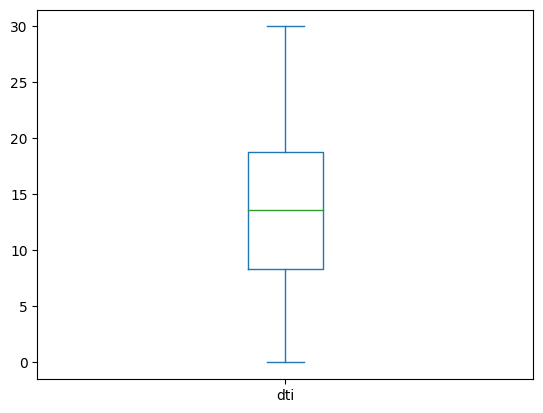

In [78]:
# visualizing outliers
loan_df_1['dti'].plot.box()

* <font color = 'blue'> dti values are ranging from 0 to 29.99 smoothly without outliers

### <font color = 'blue'> Column 'policy_code'
    - publicly available policy_code=1
    -new products not publicly available policy_code=2

In [79]:
# finding unique values and their frequency
loan_df_1['policy_code'].value_counts()

policy_code
1    35442
Name: count, dtype: int64

* <font color = 'blue'> column 'policy_code' has only 1, not useful for analysis

### <font color = 'blue'> column 'application_type'
    - Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [80]:
# finding unique values and their frequency
loan_df_1['application_type'].value_counts()

application_type
INDIVIDUAL    35442
Name: count, dtype: int64

* <font color = 'blue'> column 'application_type' has only 'INDIVIDUAL', not useful for analysis

# <font color = 'red'> **Data Engineering**
* <font color = 'blue'> Creation of new columns from existing columns

* <font color = 'blue'> the records with 'loan_status' as 'Fully Paid' are considered as `'non default' `
* <font color = 'blue'> the records with 'loan_status' as 'Charged Off' are considered as `'default'` 
* <font color = 'blue'> the records with 'loan_status' as 'Current' are neither `'default'` nor `'non default'` as they are still ongoing, hence they are not consisdered for analysis

In [81]:
loan_df_2 = loan_df_1[loan_df_1['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [82]:
loan_df_2['loan_status'].value_counts()

loan_status
Fully Paid     29488
Charged Off     5026
Name: count, dtype: int64

* <font color = 'blue'> creating new column `'default_status'` out of the existing column 'loan_status'

In [83]:
loan_df_2['default_status'] = np.where(loan_df_2['loan_status']=='Charged Off', 'default', 'non default')

In [84]:
loan_df_2['default_status'].value_counts()

default_status
non default    29488
default         5026
Name: count, dtype: int64

* <font color = 'blue'> creation of new column `'annual_inc_bin'` out of 'annual_inc' column

In [85]:
loan_df_2['annual_inc'].min(), loan_df_2['annual_inc'].max()

(4000.0, 129996.0)

In [86]:
130/5

26.0

In [87]:
bins = [0, 26000, 52000, 78000, 104000, 130000]
labels = ['<26k', '26k-52k', '52k-78k', '78k-104k', '104k-130k']

# Create bins and labels
loan_df_2['annual_inc_binned'] = pd.cut(loan_df_2['annual_inc'], bins=bins, labels=labels)

* <font color = 'blue'> creation of new column `'loan_amnt_bin'` out of 'loan_amnt' column

In [88]:
loan_df_2['loan_amnt'].min(), loan_df_2['loan_amnt'].max()

(500, 29900)

In [89]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]
labels = ['<5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k']

# Create bins and labels
loan_df_2['loan_amnt_binned'] = pd.cut(loan_df_2['loan_amnt'], bins=bins, labels=labels)

* <font color = 'blue'> creation of new column `'dti_bin'` out of 'dti' column

In [90]:
loan_df_2['dti'].min(), loan_df_2['dti'].max()

(0.0, 29.99)

In [91]:
bins = [0,5,10,15,20,25,30]
labels = ['<5', '5-10', '10-15', '15-20', '20-25', '25-30']

# Create bins and labels
loan_df_2['dti_binned'] = pd.cut(loan_df_2['dti'], bins=bins, labels=labels)

* <font color = 'blue'> creation of new column `'int_rate_bin'` out of 'int_rate(%)' column

In [92]:
loan_df_2['int_rate(%)'].min(), loan_df_2['int_rate(%)'].max()

(5.42, 22.48)

In [93]:
bins = [5, 10, 15, 20, 25]
labels = ['5-10', '10-15', '15-20', '20-25']

# Create bins and labels
loan_df_2['int_rate_binned'] = pd.cut(loan_df_2['int_rate(%)'], bins=bins, labels=labels)

* <font color = 'blue'> creation of new column `'installment_bin'` out of 'installment' column

In [94]:
loan_df_2['installment'].min(), loan_df_2['installment'].max()

(15.69, 799.49)

In [95]:
bins = [0, 160, 320, 480, 640, 800]
labels = ['<160', '160-320', '320-480', '480-640', '640-800']

# Create bins and labels
loan_df_2['installment_binned'] = pd.cut(loan_df_2['installment'], bins=bins, labels=labels)

* <font color = 'blue'> checking the final dataframe

In [99]:
loan_df_2.shape

(34514, 29)

In [100]:
loan_df_2.columns

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'addr_state', 'zip_code',
       'application_type', 'pub_rec_bankruptcies', 'loan_amnt', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'issue_d',
       'loan_status', 'dti', 'policy_code', 'int_rate(%)', 'issue_d_month',
       'issue_d_year', 'default_status', 'annual_inc_binned',
       'loan_amnt_binned', 'dti_binned', 'int_rate_binned',
       'installment_binned'],
      dtype='object')

In [101]:
loan_df_2.head(2)

,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,zip_code,application_type,pub_rec_bankruptcies,loan_amnt,term,int_rate,installment,grade,sub_grade,issue_d,loan_status,dti,policy_code,int_rate(%),issue_d_month,issue_d_year,default_status,annual_inc_binned,loan_amnt_binned,dti_binned,int_rate_binned,installment_binned
0,Unknown,10,RENT,24000.0,Verified,credit_card,AZ,860xx,INDIVIDUAL,0.0,5000,36 months,10.65%,162.87,B,B2,Dec-11,Fully Paid,27.65,1,10.65,Dec,2011,non default,<26k,<5k,25-30,10-15,160-320
1,Ryder,0,RENT,30000.0,Source Verified,car,GA,309xx,INDIVIDUAL,0.0,2500,60 months,15.27%,59.83,C,C4,Dec-11,Charged Off,1.00,1,15.27,Dec,2011,default,26k-52k,<5k,<5,15-20,<160


# <font color = 'red'> **Creation of seperate dataframes for default and non default**

* <font color = 'blue'> creation of seperate dataframes for default and non default will be done 
* <font color = 'blue'> only default records will be considered for analysis

In [102]:
default_df = loan_df_2[loan_df_2['default_status']=='default']
nondefault_df = loan_df_2[loan_df_2['default_status']=='non default']

In [103]:
default_ratio = loan_df_2['default_status'].value_counts(normalize=True)

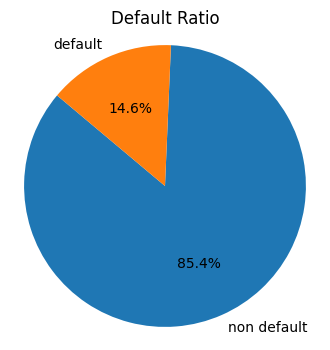

In [104]:
plt.figure(figsize=(4,4))
plt.pie(default_ratio, labels=default_ratio.index, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Default Ratio')
plt.show()

# <font color = 'red'> **1. Univariate Analysis**

* <font color = 'blue'> univariate analysis of default vs non default records

### <font color = 'blue'> **1.1. Plot of Loan Amount Binned**

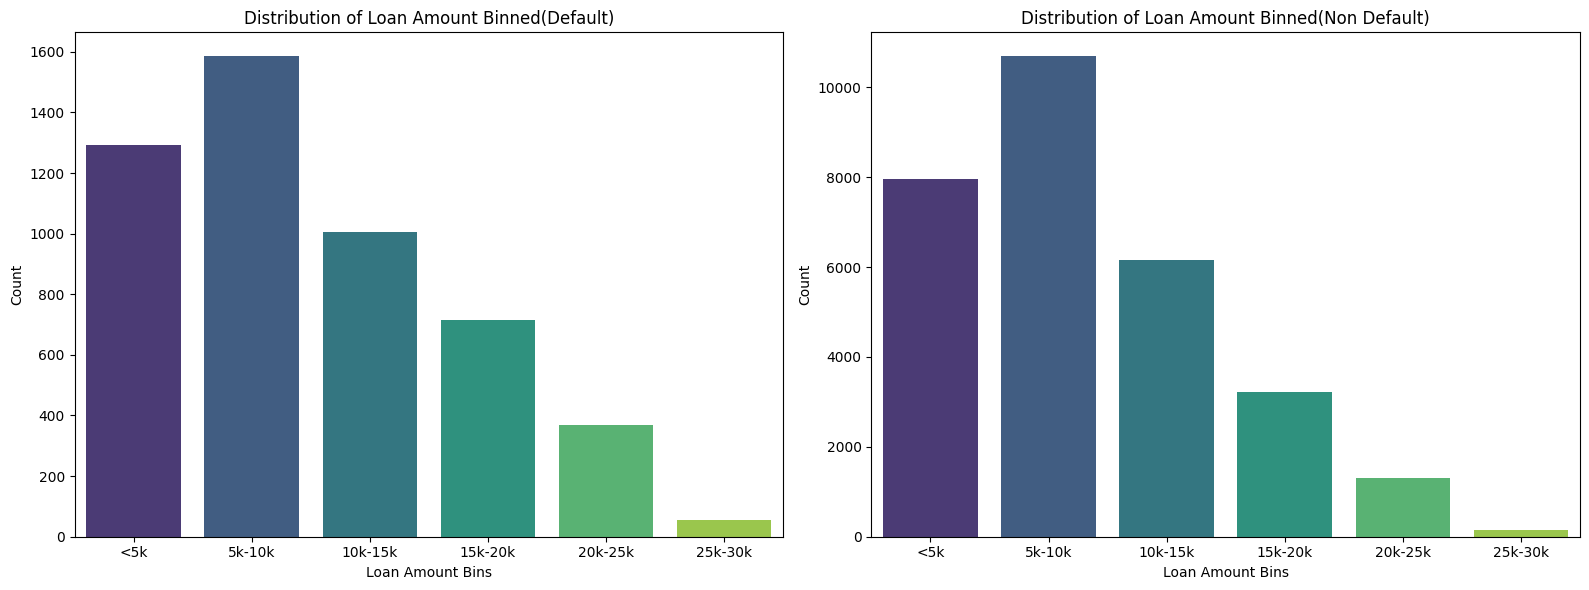

In [105]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x='loan_amnt_binned', data=default_df, palette='viridis')
plt.title('Distribution of Loan Amount Binned(Default)')
plt.xlabel('Loan Amount Bins')
plt.ylabel('Count')


plt.subplot(1,2,2)
sns.countplot(x='loan_amnt_binned', data=nondefault_df, palette='viridis')
plt.title('Distribution of Loan Amount Binned(Non Default)')
plt.xlabel('Loan Amount Bins')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is no special pattern seen in `default` cases while compared with `non default` cases

### <font color = 'blue'> **1.2. Plot of Term**

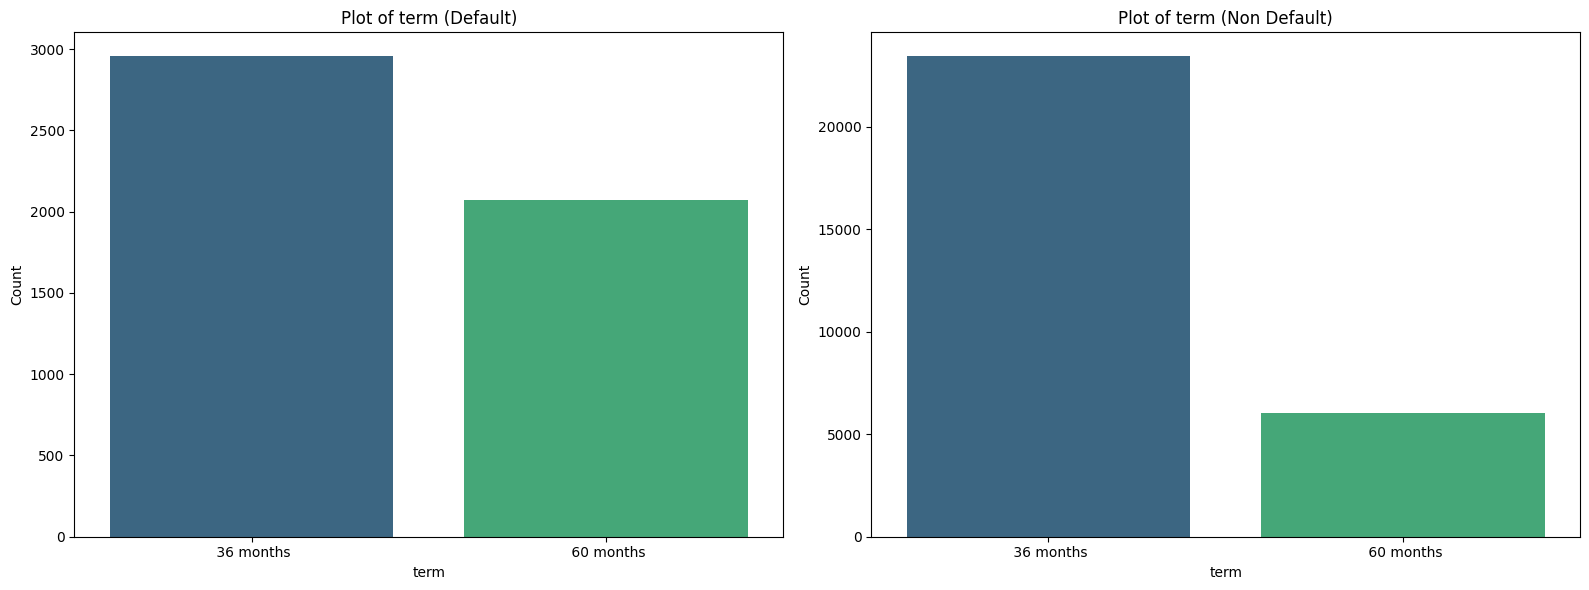

In [106]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x='term', data=default_df, palette='viridis', order = default_df['term'].value_counts().index)
plt.title('Plot of term (Default)')
plt.xlabel('term')
plt.ylabel('Count')


plt.subplot(1,2,2)
sns.countplot(x='term', data=nondefault_df, palette='viridis', order = nondefault_df['term'].value_counts().index)
plt.title('Plot of term (Non Default)')
plt.xlabel('term')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is a clear observation that consumers of '60 months' term are more likely to default in comparison with '36 months'

### <font color = 'blue'> **1.3. Plot of Interest Rate Binned**

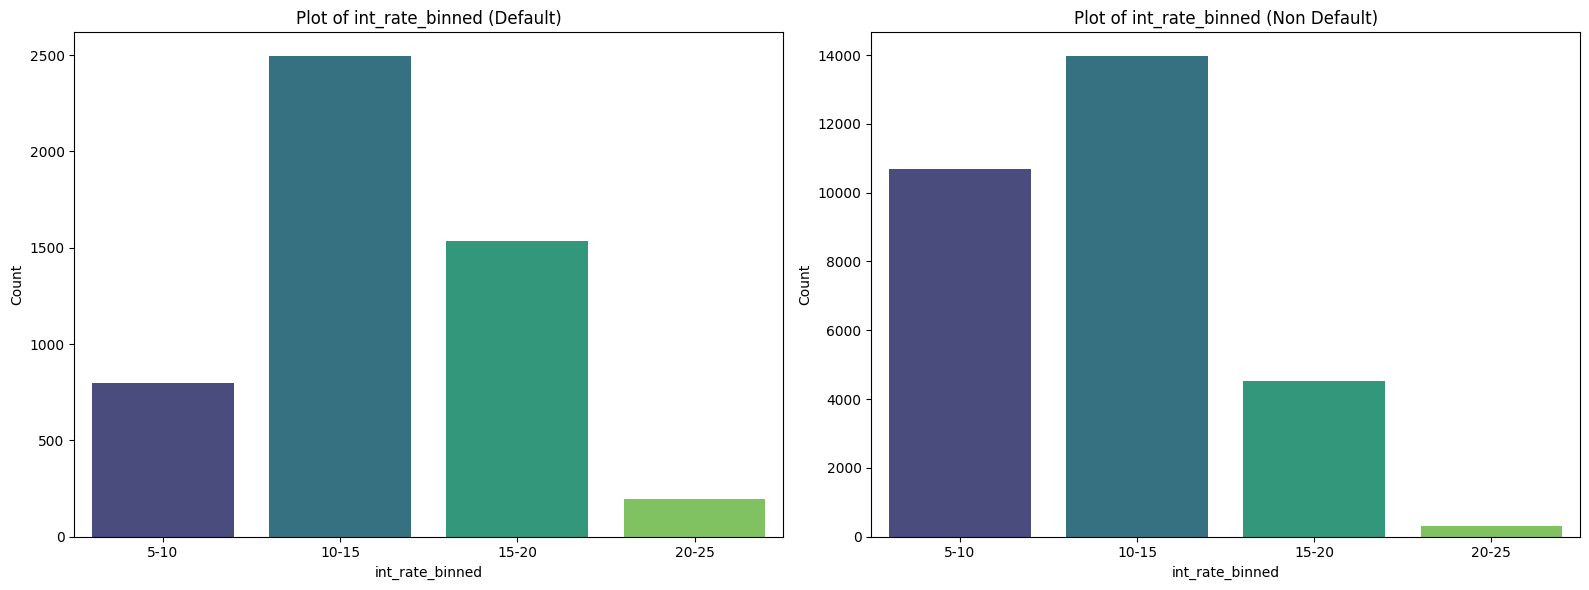

In [107]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x='int_rate_binned', data=default_df, palette='viridis')
plt.title('Plot of int_rate_binned (Default)')
plt.xlabel('int_rate_binned')
plt.ylabel('Count')


plt.subplot(1,2,2)
sns.countplot(x='int_rate_binned', data=nondefault_df, palette='viridis')
plt.title('Plot of int_rate_binned (Non Default)')
plt.xlabel('int_rate_binned')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is a small observation that loans of '5-10%' interest rate are less likely to default, whereas loans of '15-20%' and '20-25%' are more likely to default

### <font color = 'blue'> **1.4. Plot of Installment Binned**

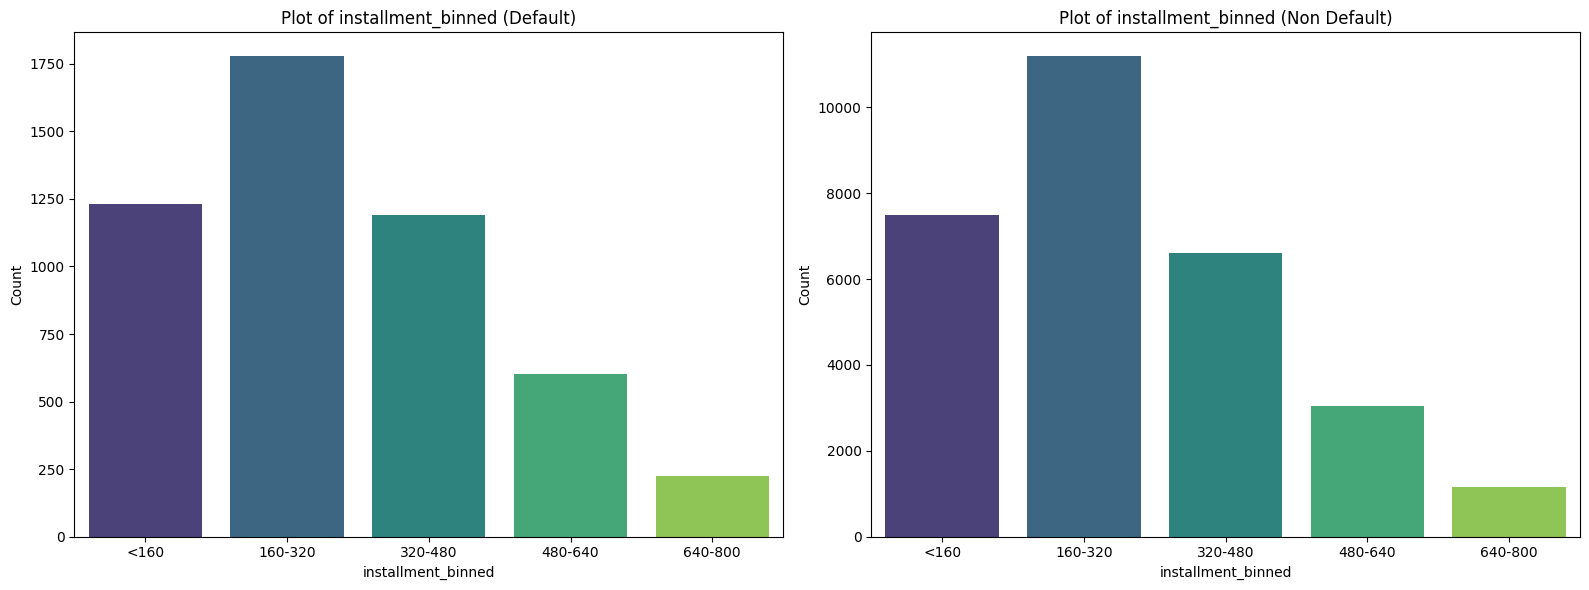

In [108]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x='installment_binned', data=default_df, palette='viridis')
plt.title('Plot of installment_binned (Default)')
plt.xlabel('installment_binned')
plt.ylabel('Count')


plt.subplot(1,2,2)
sns.countplot(x='installment_binned', data=nondefault_df, palette='viridis')
plt.title('Plot of installment_binned (Non Default)')
plt.xlabel('installment_binned')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is no special pattern seen in `default` cases while compared with `non default` cases

### <font color = 'blue'> **1.5. Plot of Grade**

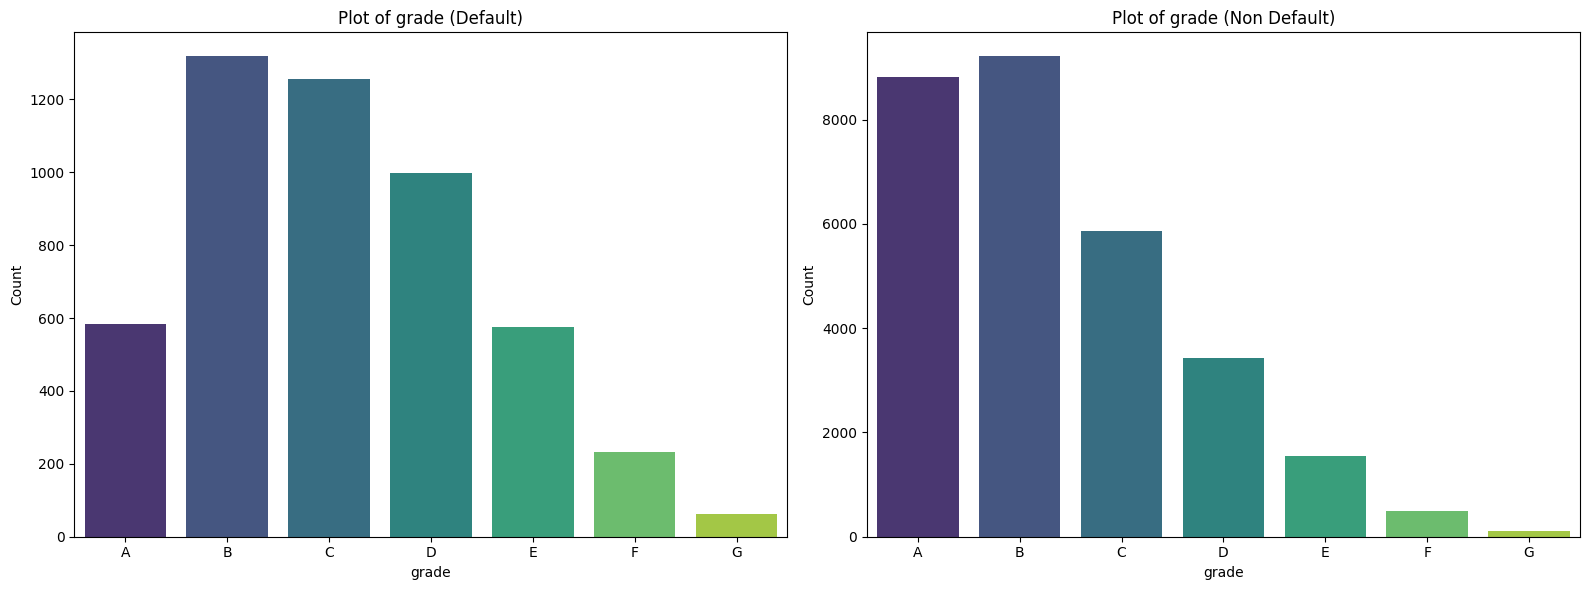

In [109]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x='grade', data=default_df, palette='viridis', order = default_df['grade'].value_counts().sort_index(ascending=True).index)
plt.title('Plot of grade (Default)')
plt.xlabel('grade')
plt.ylabel('Count')


plt.subplot(1,2,2)
sns.countplot(x='grade', data=nondefault_df, palette='viridis', order = nondefault_df['grade'].value_counts().sort_index(ascending=True).index)
plt.title('Plot of grade (Non Default)')
plt.xlabel('grade')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> in case of 'A' grade there is a clear observation that are `less likely` to default
* <font color = 'blue'> in case of 'C, 'D', 'E', 'F' and 'G' grades there is a clear observation that are `more likely` to default

### <font color = 'blue'> **1.6. Plot of Sub Grade**

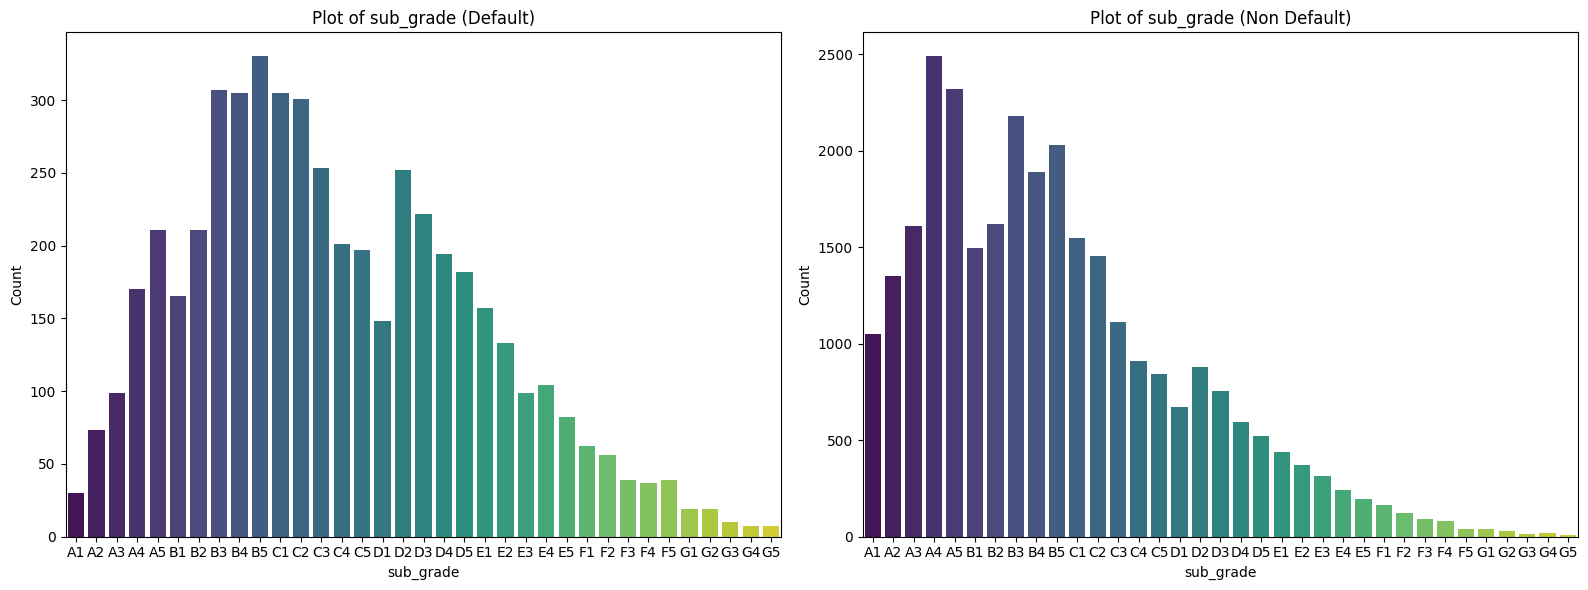

In [110]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x='sub_grade', data=default_df, palette='viridis', order = default_df['sub_grade'].value_counts().sort_index(ascending=True).index)
plt.title('Plot of sub_grade (Default)')
plt.xlabel('sub_grade')
plt.ylabel('Count')


plt.subplot(1,2,2)
sns.countplot(x='sub_grade', data=nondefault_df, palette='viridis', order = nondefault_df['sub_grade'].value_counts().sort_index(ascending=True).index)
plt.title('Plot of sub_grade (Non Default)')
plt.xlabel('sub_grade')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> loans with safer grades like 'A , B' have less chances of default
* <font color = 'blue'> loans with grades like 'D , E' have more chances of default

### <font color = 'blue'> **1.7. Plot of Employment Length**

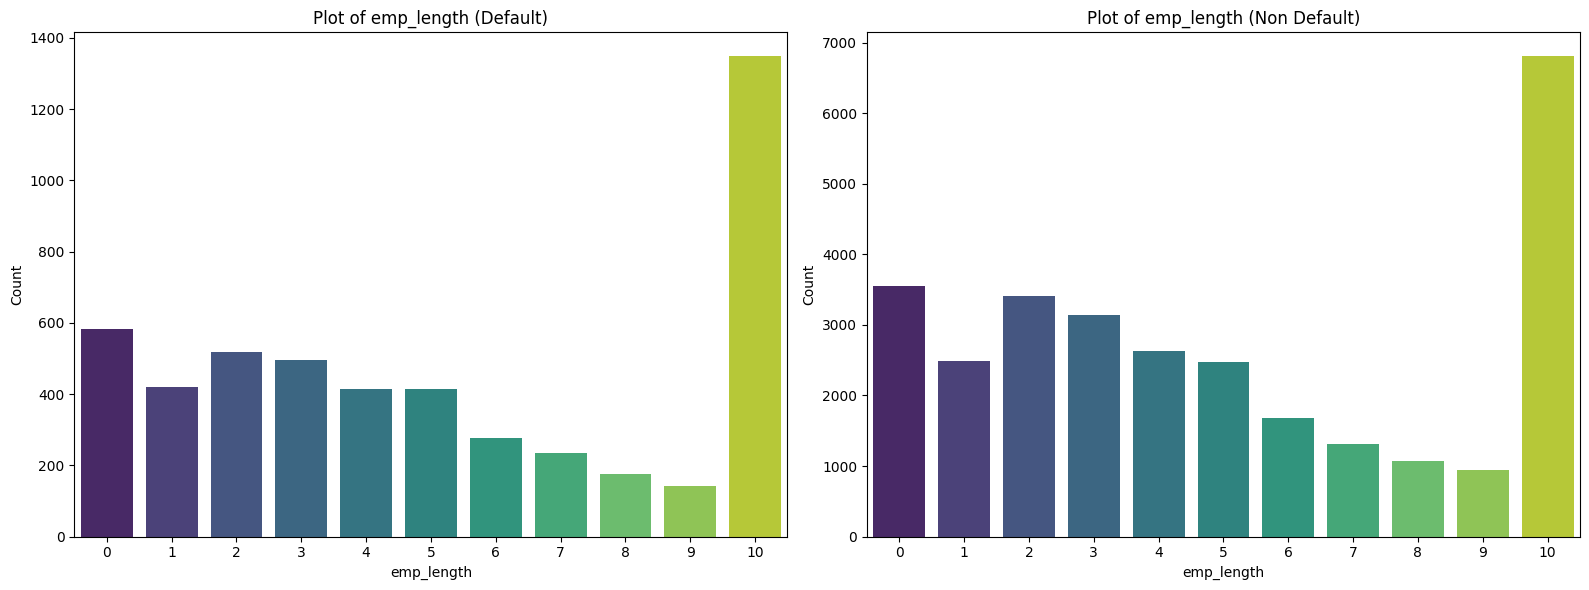

In [111]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x='emp_length', data=default_df, palette='viridis')
plt.title('Plot of emp_length (Default)')
plt.xlabel('emp_length')
plt.ylabel('Count')


plt.subplot(1,2,2)
sns.countplot(x='emp_length', data=nondefault_df, palette='viridis')
plt.title('Plot of emp_length (Non Default)')
plt.xlabel('emp_length')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is no special pattern seen in `default` cases while compared with `non default` case

### <font color = 'blue'> **1.8. Plot of Home Ownership**

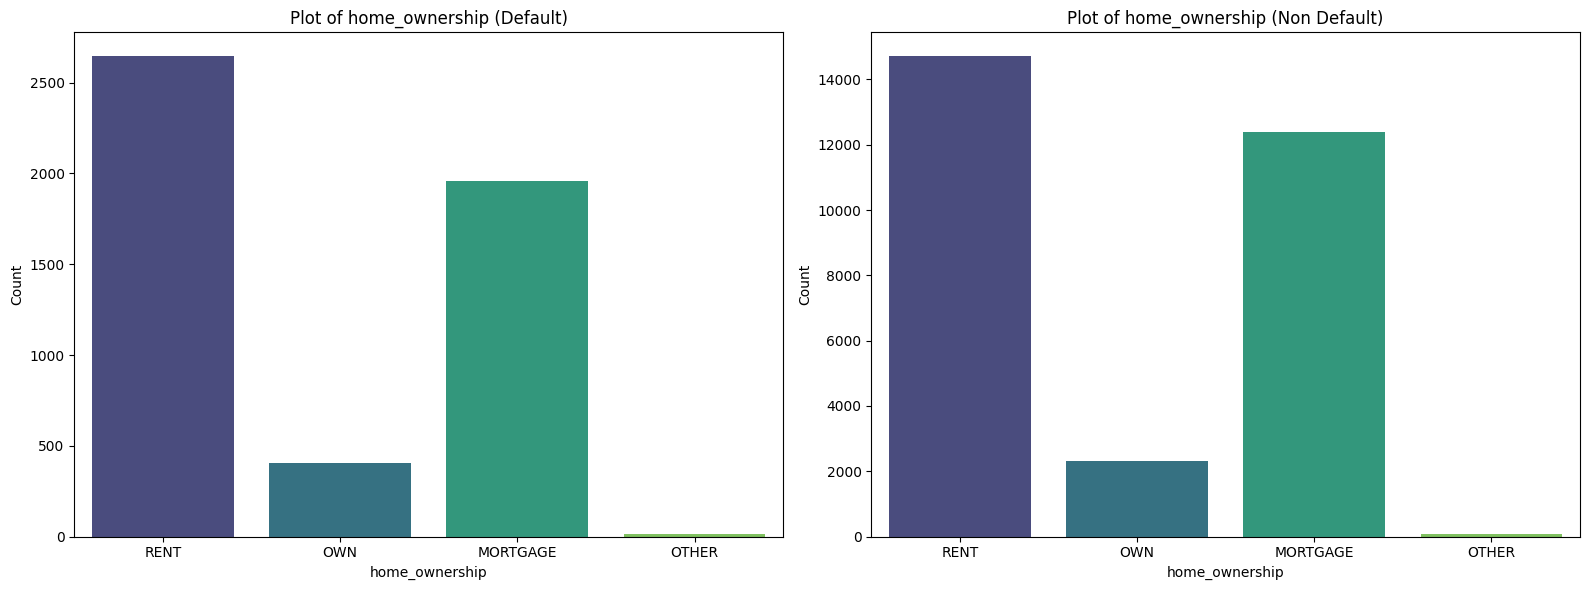

In [112]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x='home_ownership', data=default_df, palette='viridis')
plt.title('Plot of home_ownership (Default)')
plt.xlabel('home_ownership')
plt.ylabel('Count')


plt.subplot(1,2,2)
sns.countplot(x='home_ownership', data=nondefault_df, palette='viridis')
plt.title('Plot of home_ownership (Non Default)')
plt.xlabel('home_ownership')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is no special pattern seen in `default` cases while compared with `non default` case

### <font color = 'blue'> **1.9. Plot of Annual Income Binned**

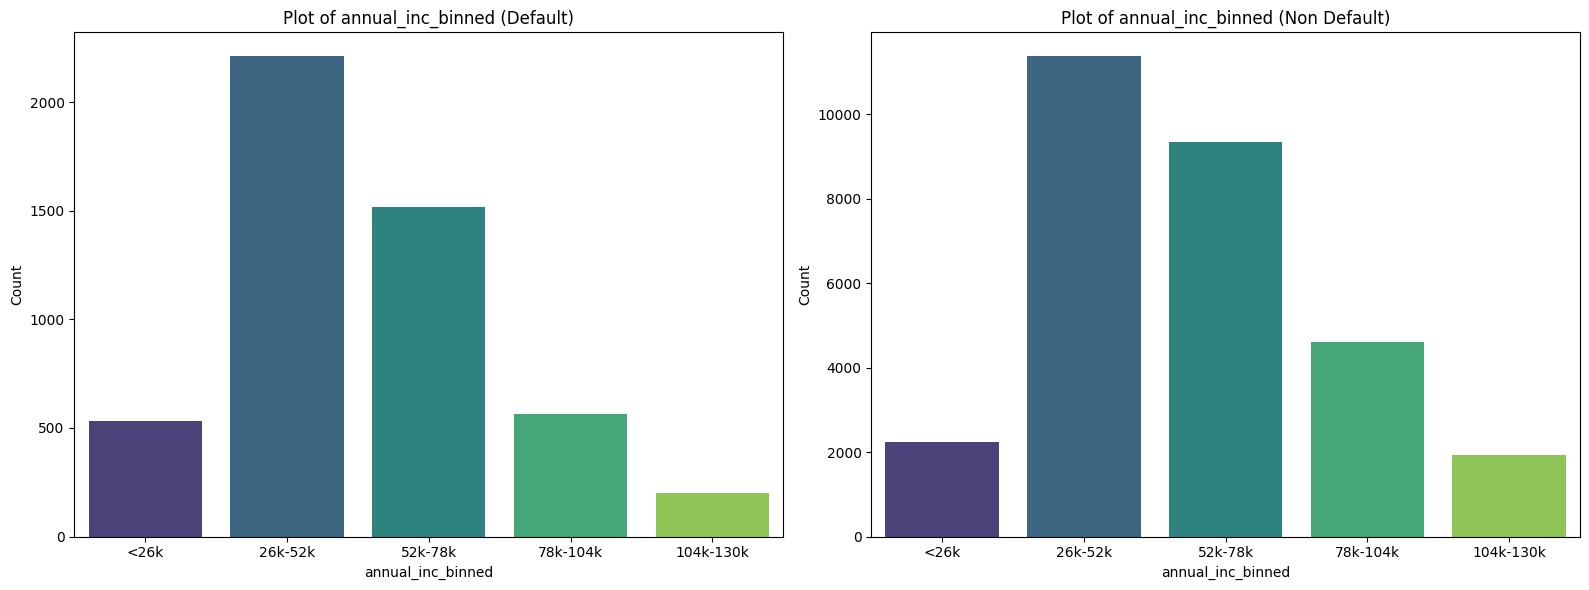

In [113]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x='annual_inc_binned', data=default_df, palette='viridis')
plt.title('Plot of annual_inc_binned (Default)')
plt.xlabel('annual_inc_binned')
plt.ylabel('Count')


plt.subplot(1,2,2)
sns.countplot(x='annual_inc_binned', data=nondefault_df, palette='viridis')
plt.title('Plot of annual_inc_binned (Non Default)')
plt.xlabel('annual_inc_binned')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is no special pattern seen in `default` cases while compared with `non default` case

### <font color = 'blue'> **1.10. Plot of Verification Status**

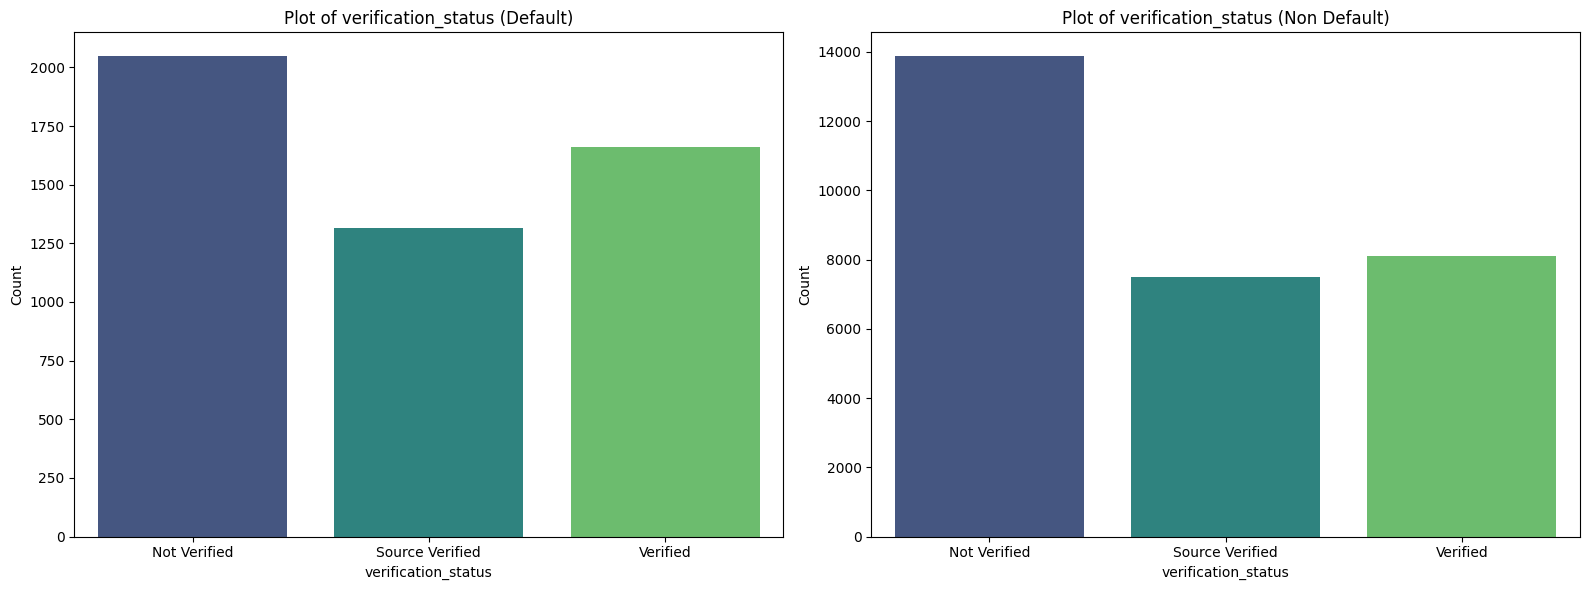

In [114]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x='verification_status', data=default_df, palette='viridis', order = default_df['verification_status'].value_counts().sort_index(ascending=True).index)
plt.title('Plot of verification_status (Default)')
plt.xlabel('verification_status')
plt.ylabel('Count')


plt.subplot(1,2,2)
sns.countplot(x='verification_status', data=nondefault_df, palette='viridis', order = nondefault_df['verification_status'].value_counts().sort_index(ascending=True).index)
plt.title('Plot of verification_status (Non Default)')
plt.xlabel('verification_status')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is no special pattern seen in `default` cases while compared with `non default` case

### <font color = 'blue'> **1.11. Plot of Issue Date Year**

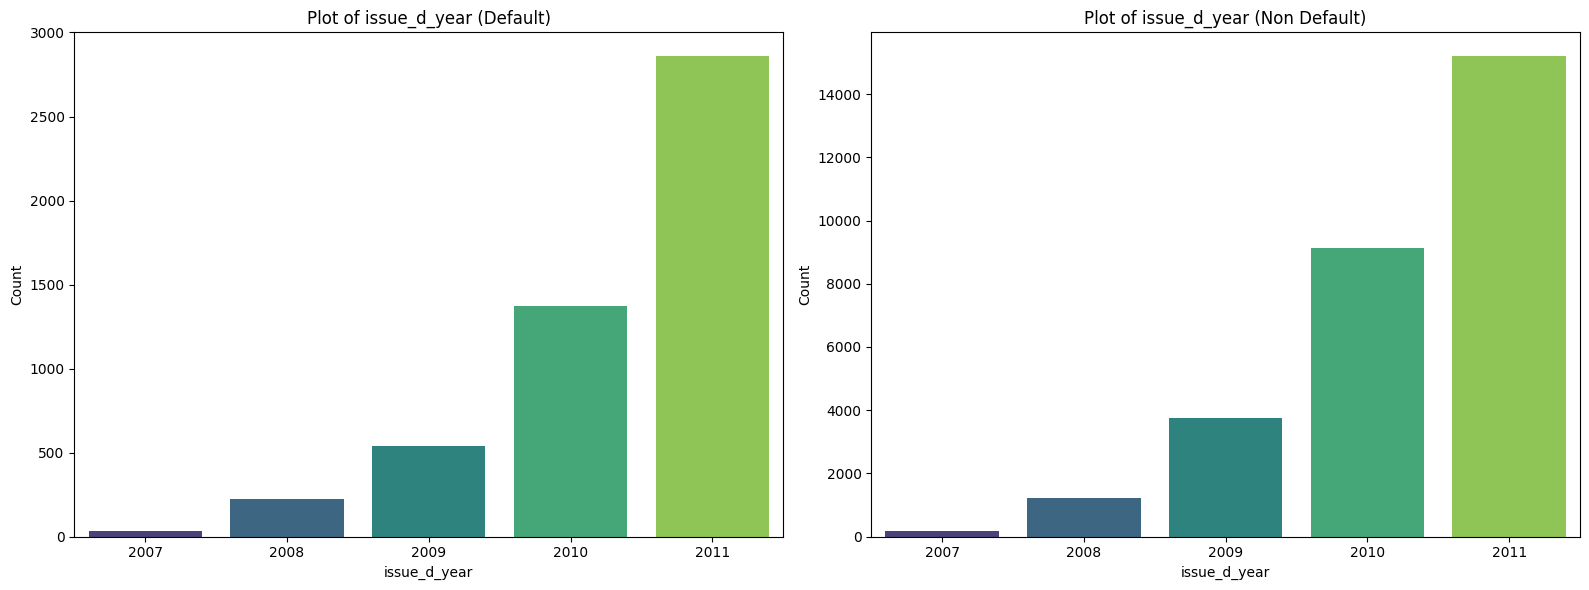

In [115]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x='issue_d_year', data=default_df, palette='viridis', order = default_df['issue_d_year'].value_counts().sort_index(ascending=True).index)
plt.title('Plot of issue_d_year (Default)')
plt.xlabel('issue_d_year')
plt.ylabel('Count')


plt.subplot(1,2,2)
sns.countplot(x='issue_d_year', data=nondefault_df, palette='viridis', order = nondefault_df['issue_d_year'].value_counts().sort_index(ascending=True).index)
plt.title('Plot of issue_d_year (Non Default)')
plt.xlabel('issue_d_year')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> in general the number of loans given are gradually increased from 2007 to 2011 and hence loan default proportion are also in the same proportion
* <font color = 'blue'> there is no special pattern seen in `default` cases while compared with `non default` case

### <font color = 'blue'> **1.12. Plot of Purpose**

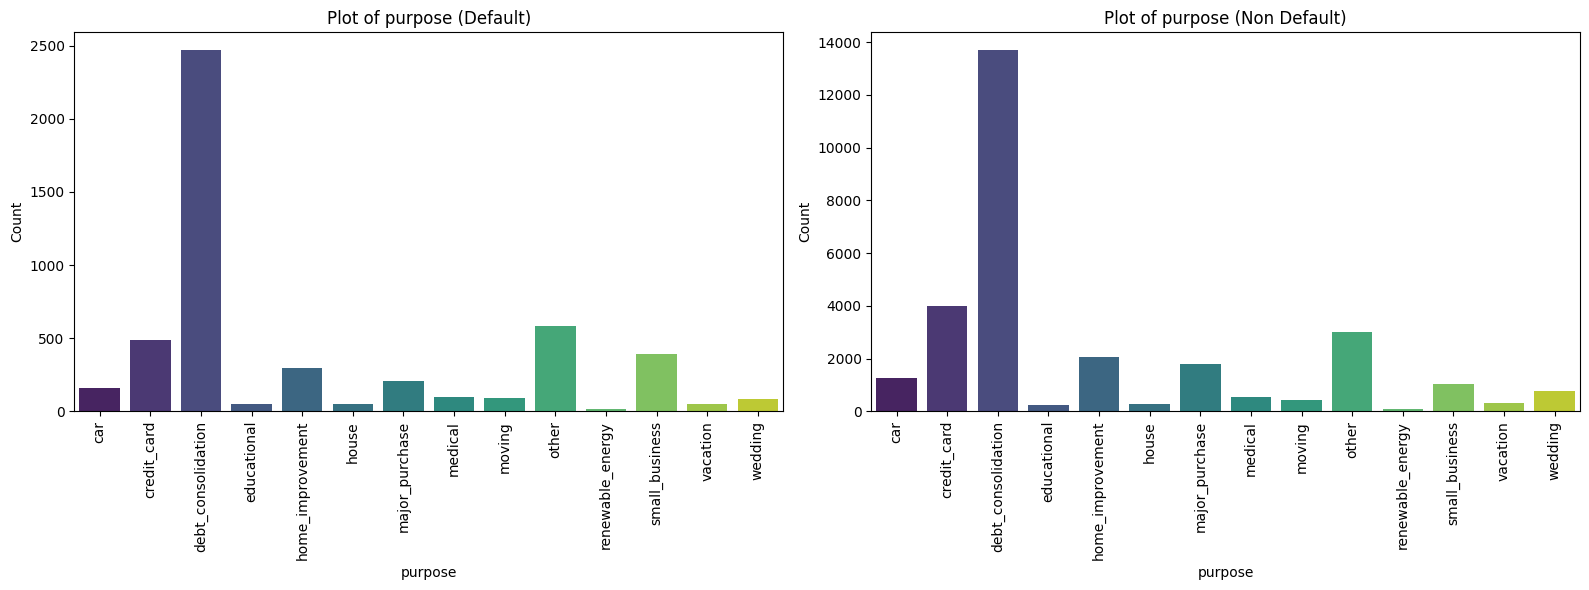

In [116]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x='purpose', data=default_df, palette='viridis', order = default_df['purpose'].value_counts().sort_index(ascending=True).index)
plt.title('Plot of purpose (Default)')
plt.xlabel('purpose')
plt.ylabel('Count')
plt.xticks(rotation = 90)


plt.subplot(1,2,2)
sns.countplot(x='purpose', data=nondefault_df, palette='viridis', order = nondefault_df['purpose'].value_counts().sort_index(ascending=True).index)
plt.title('Plot of purpose (Non Default)')
plt.xlabel('purpose')
plt.ylabel('Count')
plt.xticks(rotation = 90)


plt.tight_layout()
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is no special pattern seen in `default` cases while compared with `non default` case

### <font color = 'blue'> **1.13. Plot of addr_state**

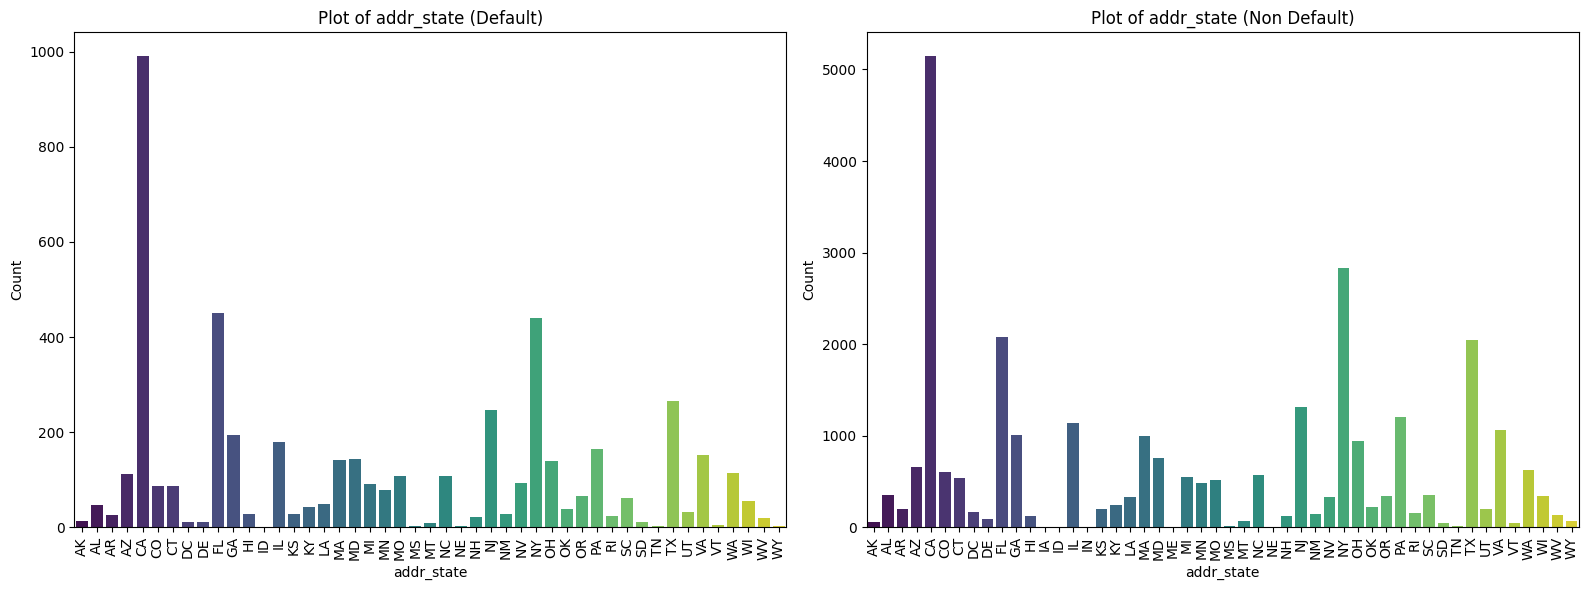

In [117]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x='addr_state', data=default_df, palette='viridis', order = default_df['addr_state'].value_counts().sort_index(ascending=True).index)
plt.title('Plot of addr_state (Default)')
plt.xlabel('addr_state')
plt.ylabel('Count')
plt.xticks(rotation = 90)


plt.subplot(1,2,2)
sns.countplot(x='addr_state', data=nondefault_df, palette='viridis', order = nondefault_df['addr_state'].value_counts().sort_index(ascending=True).index)
plt.title('Plot of addr_state (Non Default)')
plt.xlabel('addr_state')
plt.ylabel('Count')
plt.xticks(rotation = 90)


plt.tight_layout()
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is no special pattern seen in `default` cases while compared with `non default` case

### <font color = 'blue'> **1.14. Plot of dti_binned**

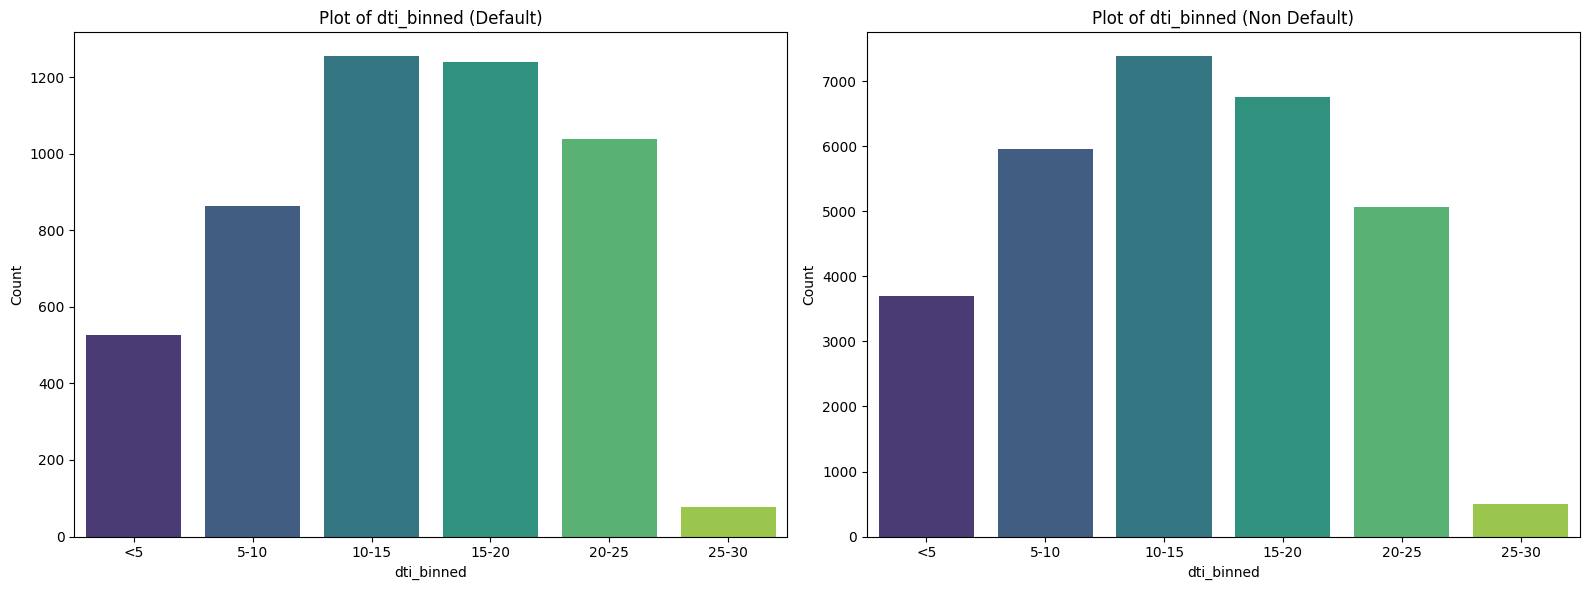

In [118]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x='dti_binned', data=default_df, palette='viridis')
plt.title('Plot of dti_binned (Default)')
plt.xlabel('dti_binned')
plt.ylabel('Count')


plt.subplot(1,2,2)
sns.countplot(x='dti_binned', data=nondefault_df, palette='viridis')
plt.title('Plot of dti_binned (Non Default)')
plt.xlabel('dti_binned')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is no special pattern seen in `default` cases while compared with `non default` case

### <font color = 'blue'> **1.15. Plot of pub_rec_bankruptcies**

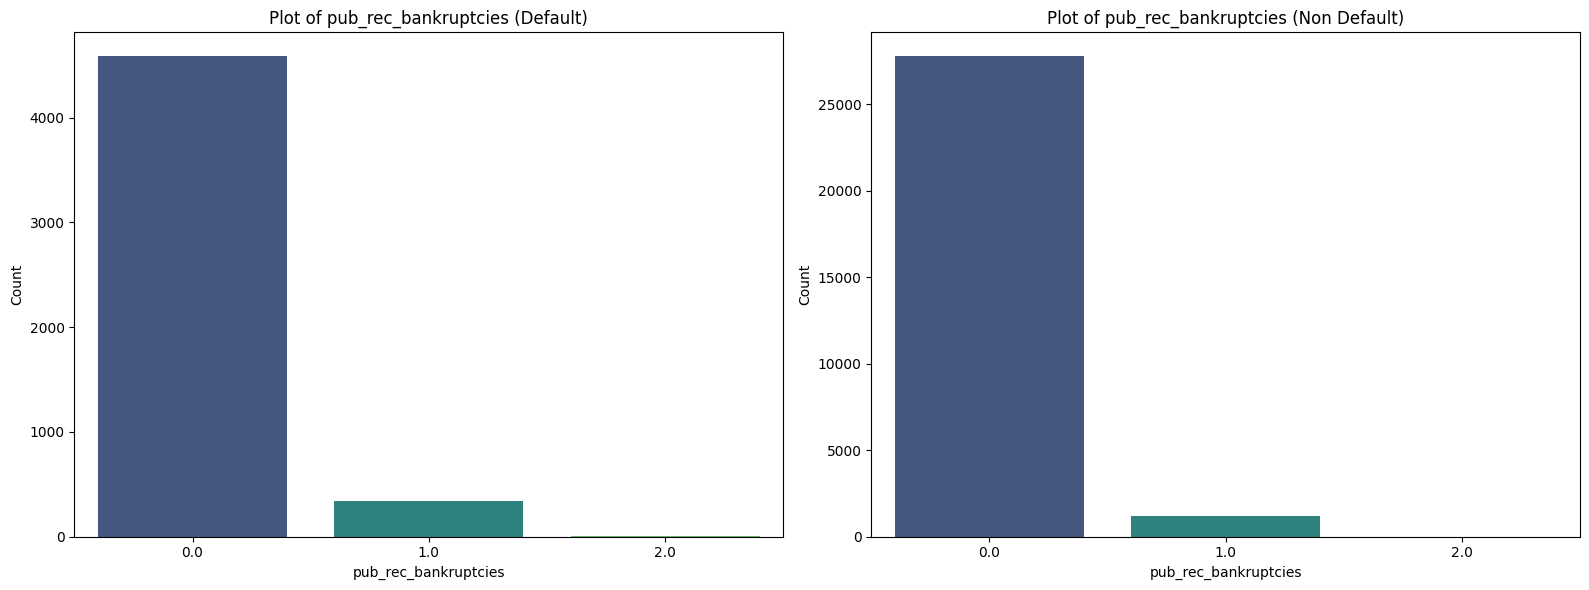

In [119]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
sns.countplot(x='pub_rec_bankruptcies', data=default_df, palette='viridis')
plt.title('Plot of pub_rec_bankruptcies (Default)')
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Count')


plt.subplot(1,2,2)
sns.countplot(x='pub_rec_bankruptcies', data=nondefault_df, palette='viridis')
plt.title('Plot of pub_rec_bankruptcies (Non Default)')
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is no special pattern seen in `default` cases while compared with `non default` case

# <font color = 'red'> **2. Bivariate Analysis**

### <font color = 'blue'> **2.1. Correlation Matrix**

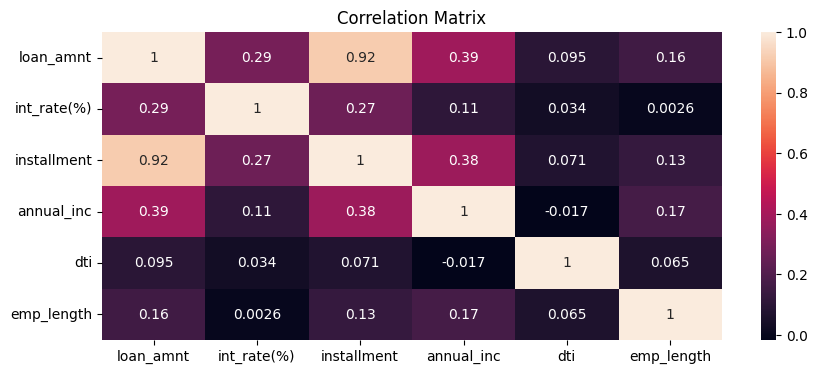

In [120]:
plt.figure(figsize = (10,4))
correlation_matrix = default_df[['loan_amnt' , 'int_rate(%)' , 'installment' , 'annual_inc' , 'dti', 'emp_length' ]].corr()
sns.heatmap(correlation_matrix , annot = True)
plt.title('Correlation Matrix')
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> the correlation is observed only between loan amount and the installments which is quite obvious

### <font color = 'blue'> **2.2. grade vs int_rate**

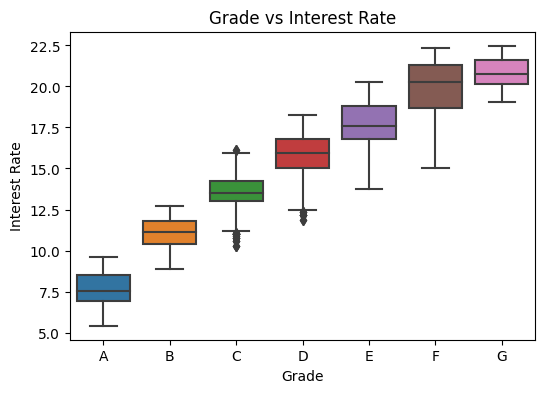

In [121]:
plt.figure(figsize = (6,4))
order = default_df['grade'].value_counts().sort_index(ascending = True).index
sns.boxplot(x = 'grade' , y = 'int_rate(%)' , data = default_df , order = order)
plt.title('Grade vs Interest Rate')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is a clear observation that as the grades gets risker , the interest rate increases

### <font color = 'blue'> **2.3. annual_inc_binned vs loan_amnt**

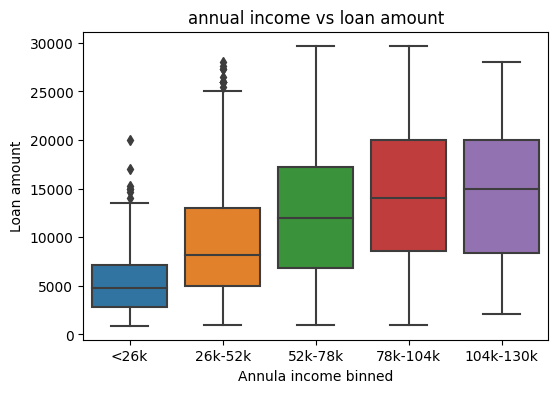

In [122]:
plt.figure(figsize = (6,4))
order = default_df['annual_inc_binned'].value_counts().sort_index(ascending = True).index
sns.boxplot(x = 'annual_inc_binned' , y = 'loan_amnt' , data = default_df , order = order)
plt.title('annual income vs loan amount')
plt.xlabel('Annula income binned')
plt.ylabel('Loan amount')
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is an indication that as the annual income increases , the loan amount also increases in general

### <font color = 'blue'> **2.4. loan_amnt_binned vs annual income**

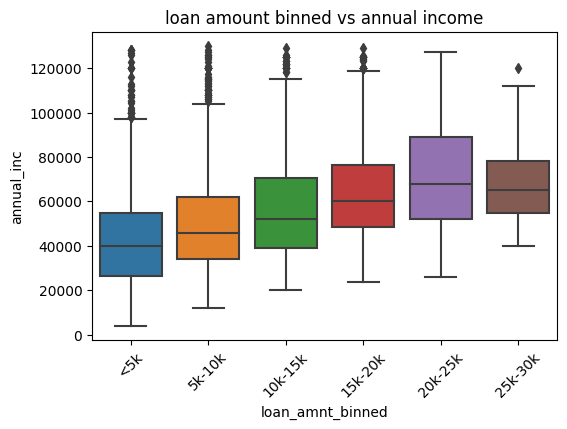

In [123]:
plt.figure(figsize = (6,4))
order = default_df['loan_amnt_binned'].value_counts().sort_index(ascending = True).index
sns.boxplot(x = 'loan_amnt_binned' , y = 'annual_inc' , data = default_df , order = order)
plt.title('loan amount binned vs annual income')
plt.xlabel('loan_amnt_binned')
plt.ylabel('annual_inc')
plt.xticks(rotation = 45)
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is a reverse observation that higher loans are claimed by people in higher income ranges

### <font color = 'blue'> **2.5. grade vs loan_amnt**

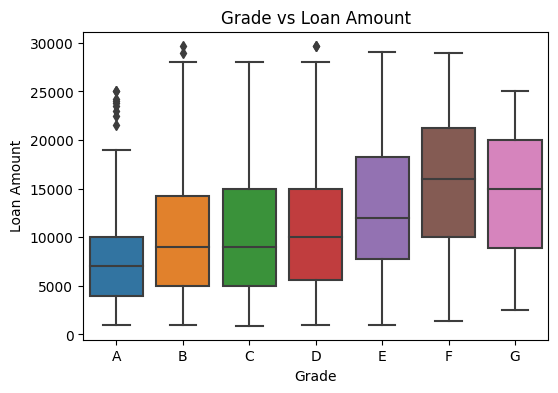

In [124]:
plt.figure(figsize = (6,4))
order = default_df['grade'].value_counts().sort_index(ascending = True).index
sns.boxplot(x = 'grade' , y = 'loan_amnt' , data = default_df , order = order)
plt.title('Grade vs Loan Amount')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is no clear relation or observation between grade and loan amount

### <font color = 'blue'> **2.6. grade vs dti**

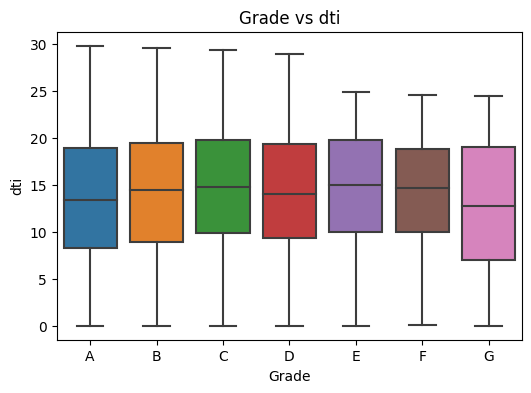

In [125]:
plt.figure(figsize = (6,4))
order = default_df['grade'].value_counts().sort_index(ascending = True).index
sns.boxplot(x = 'grade' , y = 'dti' , data = default_df , order = order)
plt.title('Grade vs dti')
plt.xlabel('Grade')
plt.ylabel('dti')
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is no clear relation or observation between grade and dti

### <font color = 'blue'> **2.7. emp_length vs home_ownership**

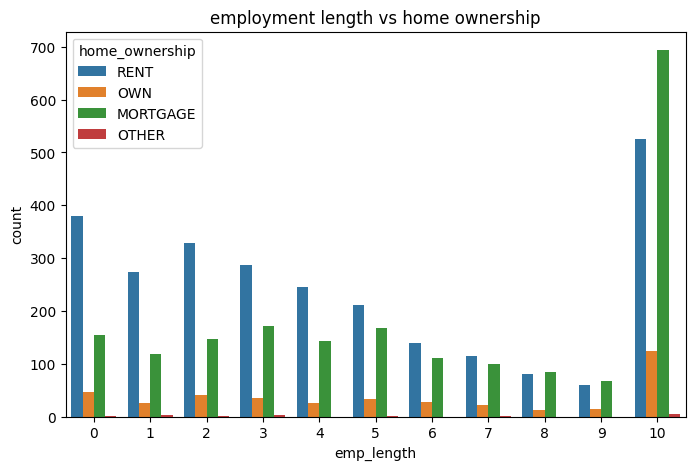

In [126]:
plt.figure(figsize = (8,5))
order = default_df['emp_length'].value_counts().sort_index(ascending = True).index
sns.countplot(x = 'emp_length' , hue = 'home_ownership' , data = default_df , order = order)
plt.title('employment length vs home ownership')
plt.xlabel('emp_length')
plt.ylabel('count')
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is no clear observation between employment length and home ownership

### <font color = 'blue'> **2.8. loan_amnt_binned vs term**

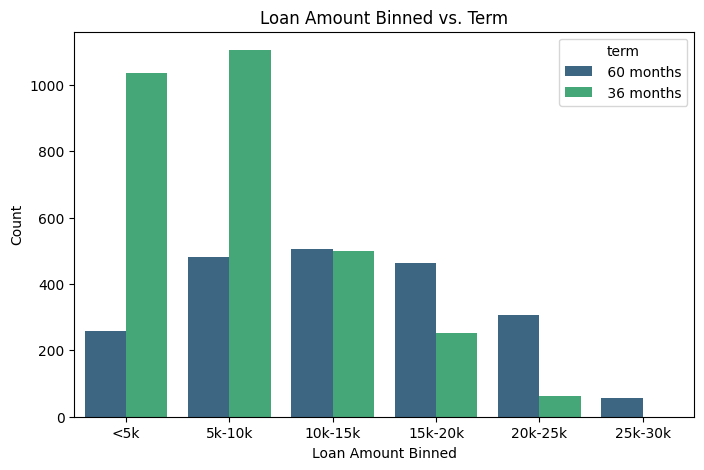

In [127]:
plt.figure(figsize=(8,5))
sns.countplot(x='loan_amnt_binned', hue='term', data=default_df, palette='viridis')
plt.title('Loan Amount Binned vs. Term')
plt.xlabel('Loan Amount Binned')
plt.ylabel('Count')
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> in the lower loan amounts more people have preferred 36 month term, but at the higher loan amounts more people have preferred 60 month term

### <font color = 'blue'> **2.9. int_rate_binned vs term**

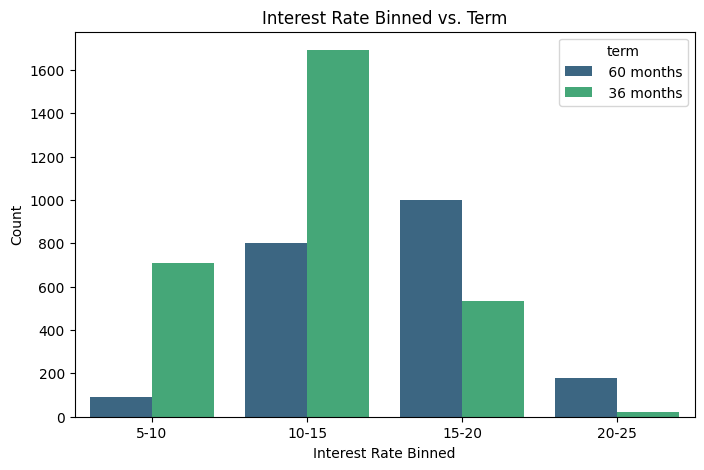

In [128]:
plt.figure(figsize=(8, 5))
sns.countplot(x='int_rate_binned', hue='term', data=default_df, palette='viridis')
plt.title('Interest Rate Binned vs. Term')
plt.xlabel('Interest Rate Binned')
plt.ylabel('Count')
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> in the lower interest rates more people have preferred 36 month term, but at the higher interest rates more people have preferred 60 month term

### <font color = 'blue'> **2.10. grade vs term**

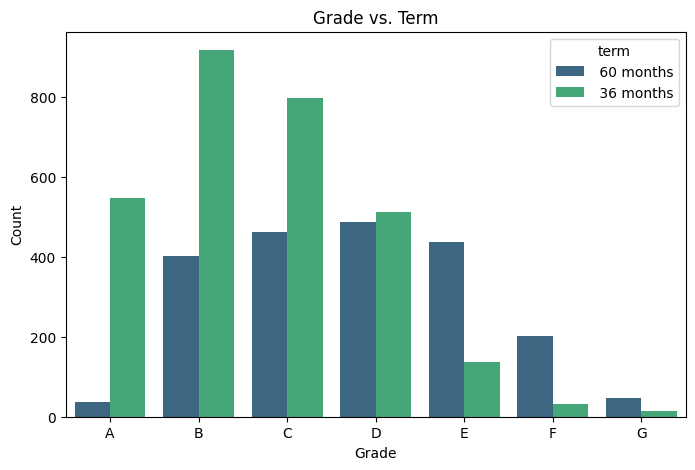

In [129]:
plt.figure(figsize=(8,5))
order = default_df['grade'].value_counts().sort_index(ascending=True).index
sns.countplot(x='grade', hue='term', data=default_df, palette='viridis', order=order)
plt.title('Grade vs. Term')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> for safer grade laons more people have preferred 36 month term but as the grade gets risky more people have preferred 60 month term

# <font color = 'red'> **3. Multivariate Analysis**

### <font color = 'blue'> **3.1. Plot of grade vs int_rate**

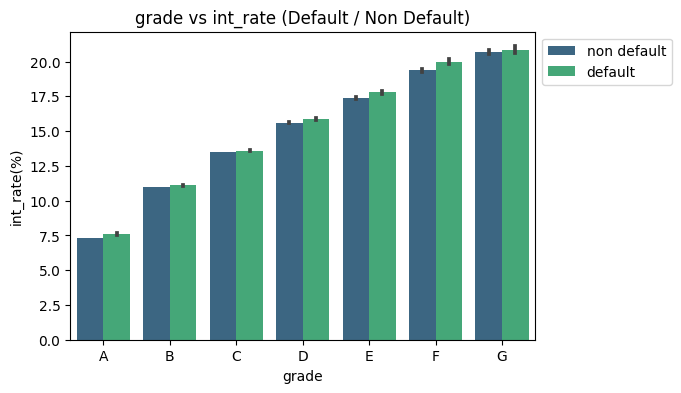

In [130]:
plt.figure(figsize = (6,4))
sns.barplot(x='grade', y = 'int_rate(%)', data=loan_df_2, hue = loan_df_2['default_status'], palette='viridis', order = default_df['grade'].value_counts().sort_index(ascending=True).index)
plt.title('grade vs int_rate (Default / Non Default)')
plt.xlabel('grade')
plt.ylabel('int_rate(%)')
plt.legend(loc = 'upper left' , bbox_to_anchor=(1, 1))
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> As grades get riskier the interest rates tend to increase

### <font color = 'blue'> **3.2. Plot of grade vs annual_inc**

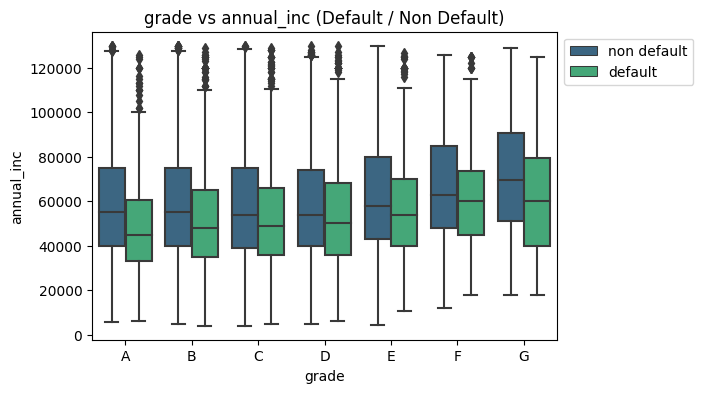

In [131]:
plt.figure(figsize = (6,4))
sns.boxplot(x='grade', y = 'annual_inc', data=loan_df_2, hue = loan_df_2['default_status'], palette='viridis', order = default_df['grade'].value_counts().sort_index(ascending=True).index)
plt.title('grade vs annual_inc (Default / Non Default)')
plt.xlabel('grade')
plt.ylabel('annual_inc')
plt.legend(loc = 'upper left' , bbox_to_anchor=(1, 1))
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is no special pattern seen in `default` cases while compared with `non default` case

### <font color = 'blue'> **3.3. Plot of annual_inc_binned vs loan_amnt**

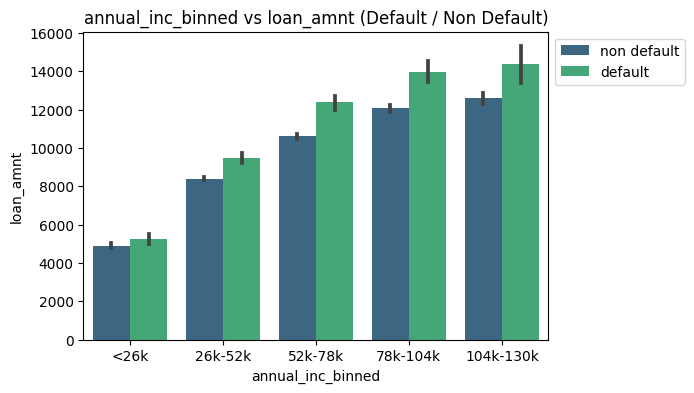

In [132]:
plt.figure(figsize = (6,4))
sns.barplot(x='annual_inc_binned', y = 'loan_amnt', data=loan_df_2, hue = loan_df_2['default_status'], palette='viridis')
plt.title('annual_inc_binned vs loan_amnt (Default / Non Default)')
plt.xlabel('annual_inc_binned')
plt.ylabel('loan_amnt')
plt.legend(loc = 'upper left' , bbox_to_anchor=(1, 1))
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> As the annual income increases the loan amount also increases

### <font color = 'blue'> **3.4. Plot of annual_inc_binned vs dti**

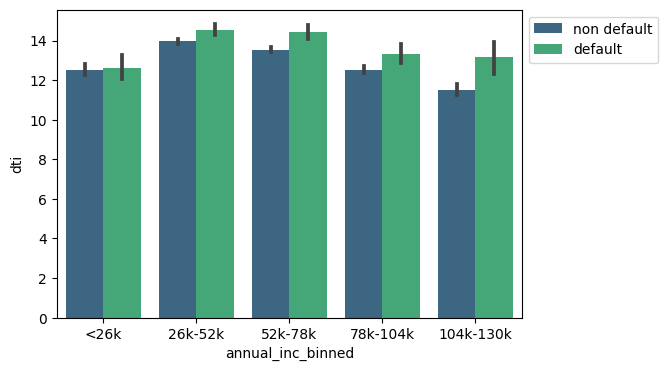

In [133]:
plt.figure(figsize = (6,4))
sns.barplot(x='annual_inc_binned', y = 'dti', data=loan_df_2, hue = loan_df_2['default_status'], palette='viridis')
plt.xlabel('annual_inc_binned')
plt.ylabel('dti')
plt.legend(loc = 'upper left' , bbox_to_anchor=(1, 1))
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is no special pattern seen in `default` cases while compared with `non default` case

### <font color = 'blue'> **3.5. loan_amnt_binned vs int_rate**

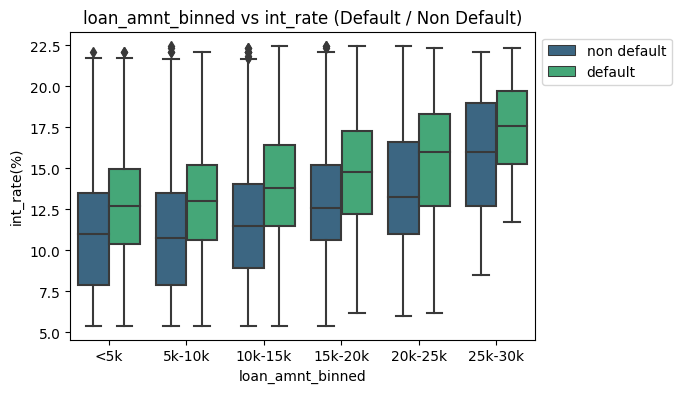

In [134]:
plt.figure(figsize = (6,4))
sns.boxplot(x='loan_amnt_binned', y = 'int_rate(%)', data=loan_df_2, hue = loan_df_2['default_status'], palette='viridis')
plt.title('loan_amnt_binned vs int_rate (Default / Non Default)')
plt.xlabel('loan_amnt_binned')
plt.ylabel('int_rate(%)')
plt.legend(loc = 'upper left' , bbox_to_anchor=(1, 1))
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> It is observed that in all the annual income ranges the interest rate is high for `default cases`
* <font color = 'blue'> It is an indication that lower interest rates are paid back but higher interest rates are defaulted

### <font color = 'blue'> **3.6. Plot of term vs annual_inc**

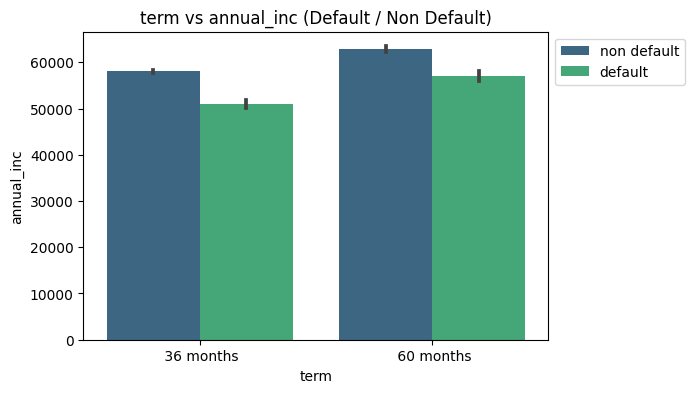

In [135]:
plt.figure(figsize = (6,4))
sns.barplot(x= 'term', y = 'annual_inc', data=loan_df_2, hue = loan_df_2['default_status'], palette='viridis', order = default_df['term'].value_counts().sort_index(ascending=True).index)
plt.title('term vs annual_inc (Default / Non Default)')
plt.xlabel('term')
plt.ylabel('annual_inc')
plt.legend(loc = 'upper left' , bbox_to_anchor=(1, 1))
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is no special pattern seen in `default` cases while compared with `non default` case

### <font color = 'blue'> **3.7. loan_amnt_binned vs dti**

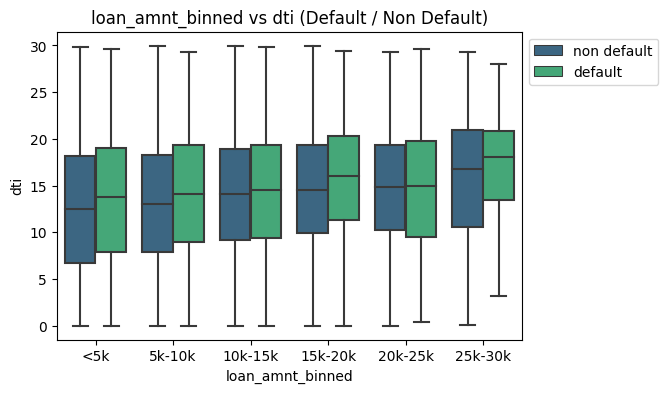

In [137]:
plt.figure(figsize = (6,4))
sns.boxplot(x='loan_amnt_binned', y = 'dti', data=loan_df_2, hue = loan_df_2['default_status'], palette='viridis')
plt.title('loan_amnt_binned vs dti (Default / Non Default)')
plt.xlabel('loan_amnt_binned')
plt.ylabel('dti')
plt.legend(loc = 'upper left' , bbox_to_anchor=(1, 1))
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is no special pattern seen in `default` cases while compared with `non default` case

### <font color = 'blue'> **3.8. annual_inc_binned vs installment**

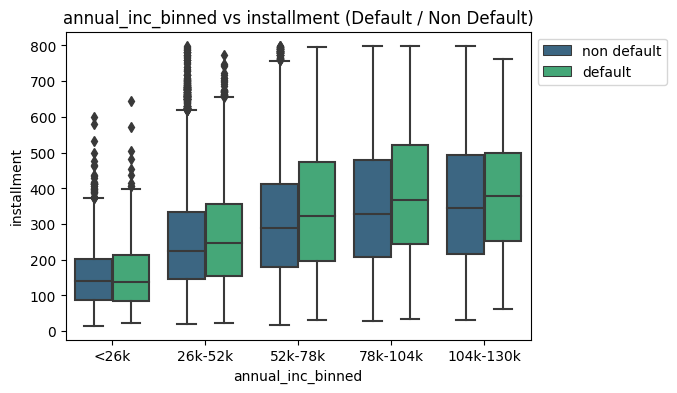

In [138]:
plt.figure(figsize = (6,4))
sns.boxplot(x='annual_inc_binned', y = 'installment', data=loan_df_2, hue = loan_df_2['default_status'], palette='viridis')
plt.title('annual_inc_binned vs installment (Default / Non Default)')
plt.xlabel('annual_inc_binned')
plt.ylabel('installment')
plt.legend(loc = 'upper left' , bbox_to_anchor=(1, 1))
plt.show()

### <font color = 'blue'> **3.9. loan_amnt_binned vs installment**

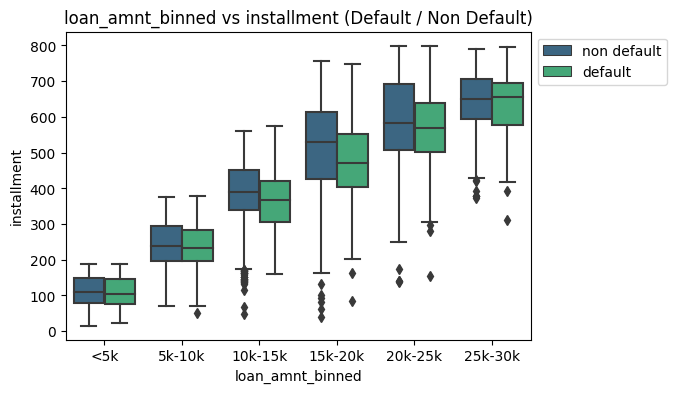

In [139]:
plt.figure(figsize = (6,4))
sns.boxplot(x='loan_amnt_binned', y = 'installment', data=loan_df_2, hue = loan_df_2['default_status'], palette='viridis')
plt.title('loan_amnt_binned vs installment (Default / Non Default)')
plt.xlabel('loan_amnt_binned')
plt.ylabel('installment')
plt.legend(loc = 'upper left' , bbox_to_anchor=(1, 1))
plt.show()

### <font color = 'orange'> **observation:**
* <font color = 'blue'> there is casual observation that installments increase with increase in loan amount

# <font color = 'red'> ----------------------------END---------------------------------------